#### **1. Import and Load Dataset**

In [1]:
# Importing necessary libraries
import xgboost as xgb  # For fast and effective gradient boosting, excelling in classification and regression tasks, especially with large datasets.
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots and visualizations
import numpy as np  # For numerical computations
import seaborn as sns  # For statistical data visualization
import tensorflow as tf  # For building and training neural networks
from sklearn.impute import KNNImputer  # For imputing missing values using KNN algorithm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # For splitting data into train and test sets, and for hyperparameter tuning
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # For encoding categorical variables, scaling numerical features to a specified range, and imputing missing values
from sklearn.linear_model import LogisticRegression  # For building logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # For evaluating model performance using various metrics
from ucimlrepo import fetch_ucirepo  # For fetching datasets from UCI Machine Learning Repository
from sklearn.svm import SVC  # For building Support Vector Machine models
from sklearn.ensemble import RandomForestClassifier  # For building Random Forest Classifier models
from sklearn.neural_network import MLPClassifier  # For building Multilayer Perceptron Classifier models
from tensorflow.keras.models import Sequential  # For building sequential neural network models
from tensorflow.keras.layers import Dense  # For adding dense layers to neural network models
from scikeras.wrappers import KerasClassifier  # For using Keras models with scikit-learn interface
from sklearn.compose import ColumnTransformer  # For applying transformations to different columns in the dataset
from imblearn.over_sampling import SMOTE  # For oversampling imbalanced data
from scipy.stats import randint  # For generating random integer values

In [2]:
from ucimlrepo import fetch_ucirepo  # For fetching datasets from the UCI Machine Learning Repository

# Fetch dataset
spambase = fetch_ucirepo(id=94)  # Fetch the Spambase dataset with ID 94

# Data (as pandas dataframes)
X = spambase.data.features  # Features of the Spambase dataset
y = spambase.data.targets  # Target labels of the Spambase dataset

# Metadata
print(spambase.metadata)  # Print metadata information about the Spambase dataset

# Variable information
print(spambase.variables)  # Print information about the variables/features in the Spambase dataset


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [3]:
df = pd.concat([X, y], axis=1, join='inner')  # Concatenate features and target labels along columns with inner join
display(df)  # Display the concatenated DataFrame

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4596           0.00            0.31              0.00                0.00   
4597           0.00            0.00              0.00                0.00   
4598           0.00            0.00              0.00                0.00   
4599           0.32            0.00              0.00                0.00   
4600           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4596             0.00            0.00  ...        0.000        0.232   
4597             0.00            0.00  ...        0.000        0.000   
4598             0.00            0.00  ...        0.102        0.718   
4599             0.00            0.00  ...        0.000        0.057   
4600             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4596          0.0        0.000        0.000        0.000   
4597          0.0        0.353        0.000        0.000   
4598          0.0        0.000        0.000        0.000   
4599          0.0        0.000        0.000        0.000   
4600          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                      

#### **2. EDA**

In [4]:
# Viewing the first few rows of the dataframe
print(df.head())  # Display the first few rows of the DataFrame

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [5]:
df.isna().sum()  # Check the number of missing values for each column in the DataFrame

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6]:
# Viewing general information about the dataframe
print(df.info())  # Print general information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
# Viewing descriptive statistics of the dataframe
print(df.describe(include='all'))  # Print descriptive statistics of the DataFrame, including all columns

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [8]:
# Selecting numerical columns
numerical = df.select_dtypes(include=['float', 'int']).columns  
# Identify and store the column names of numerical features in the DataFrame


In [9]:
# Extracting only the numerical columns from the DataFrame
numerical_df = df[numerical] 

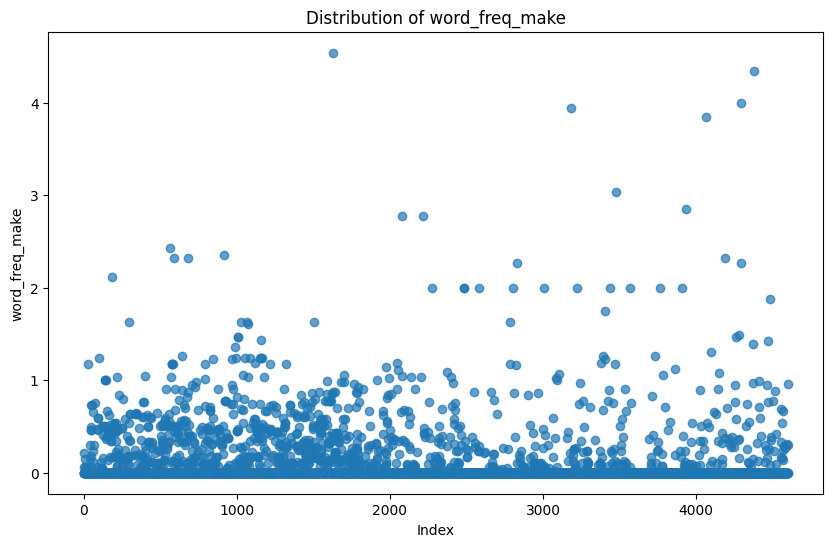

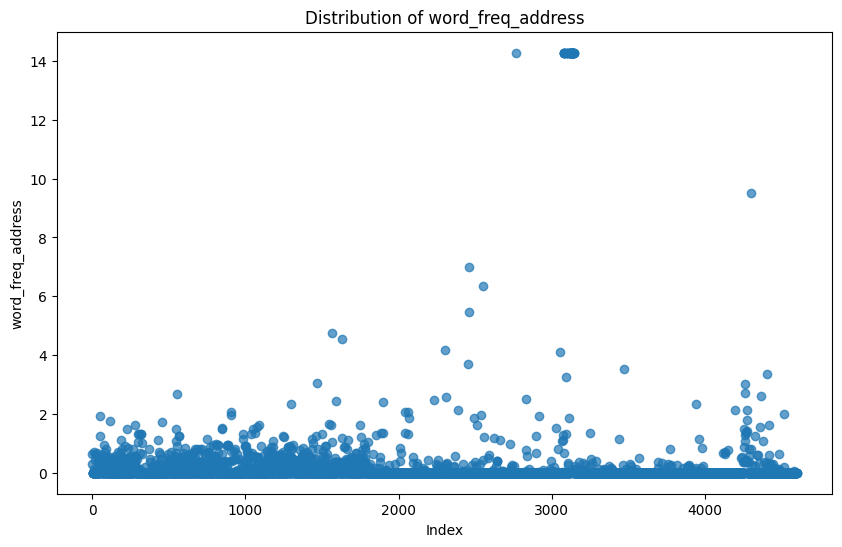

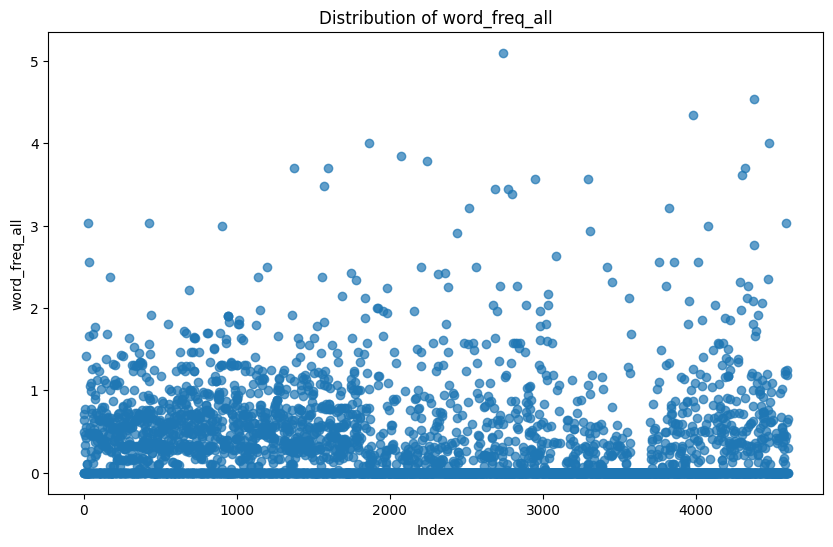

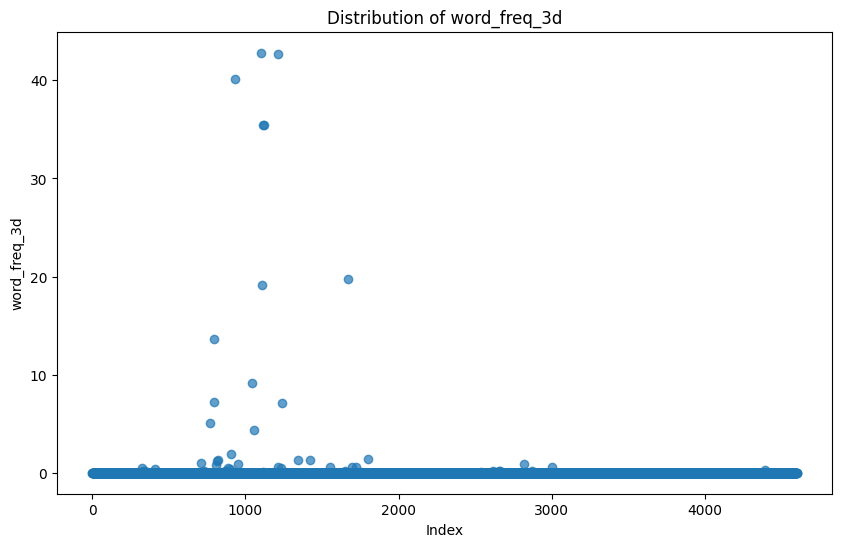

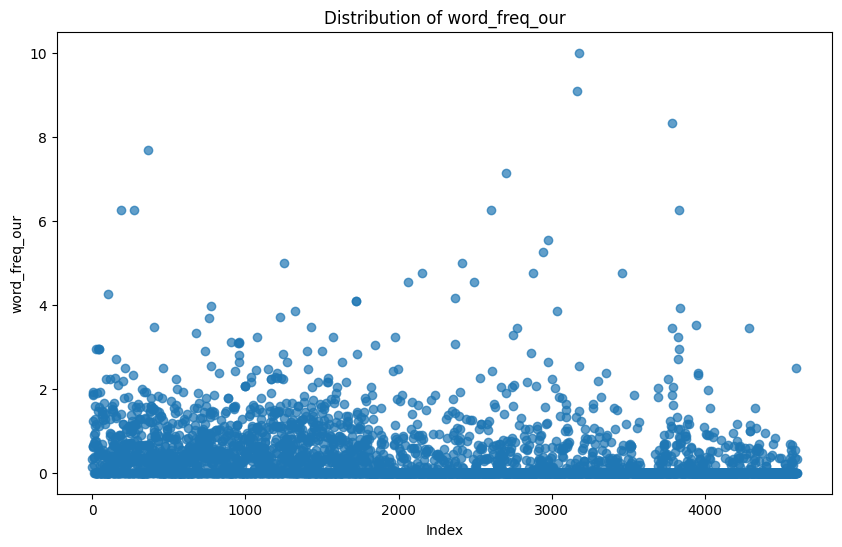

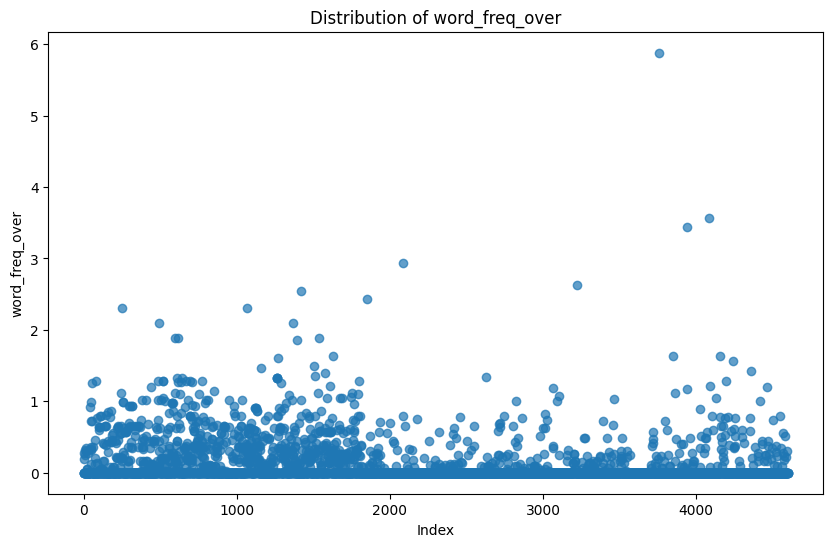

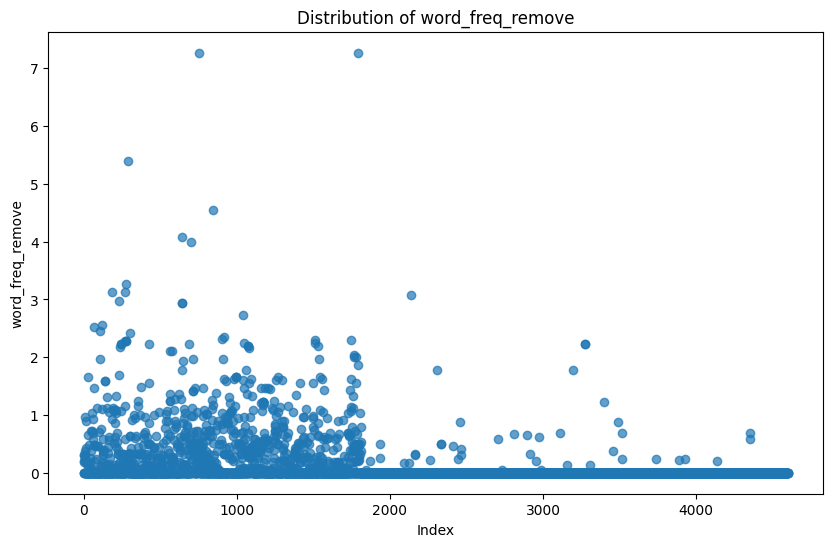

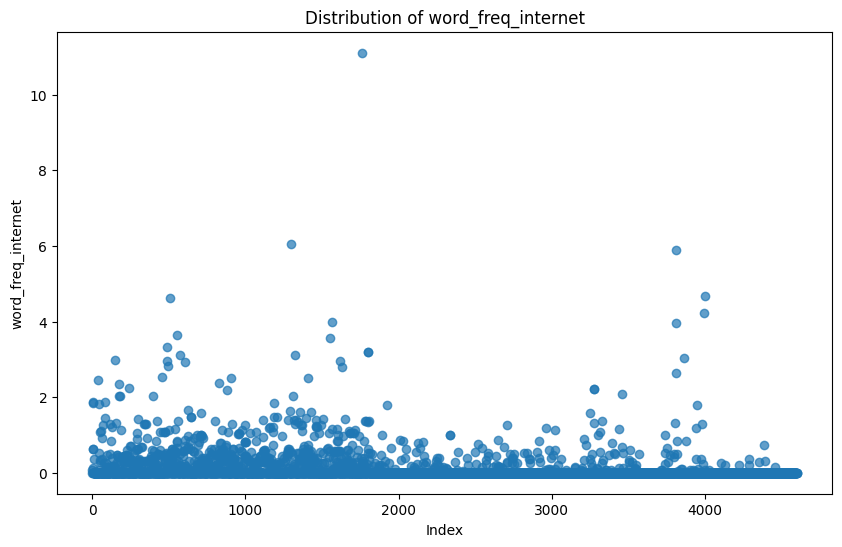

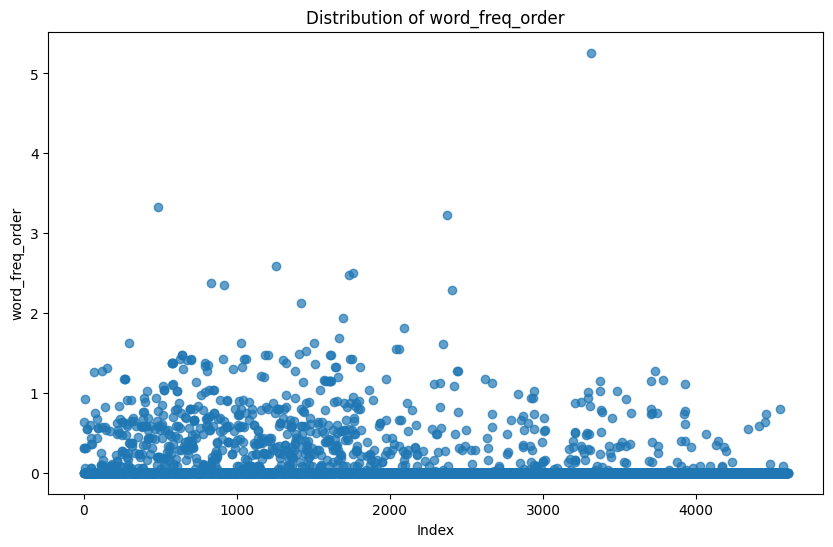

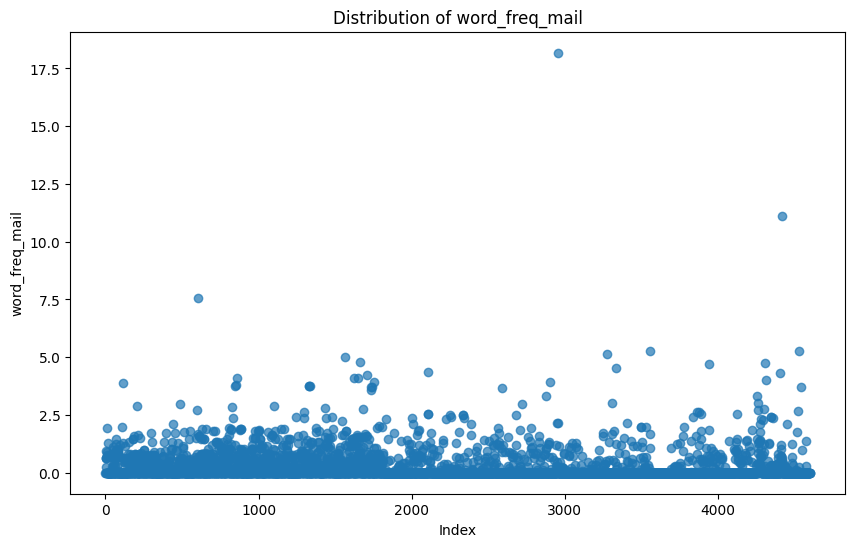

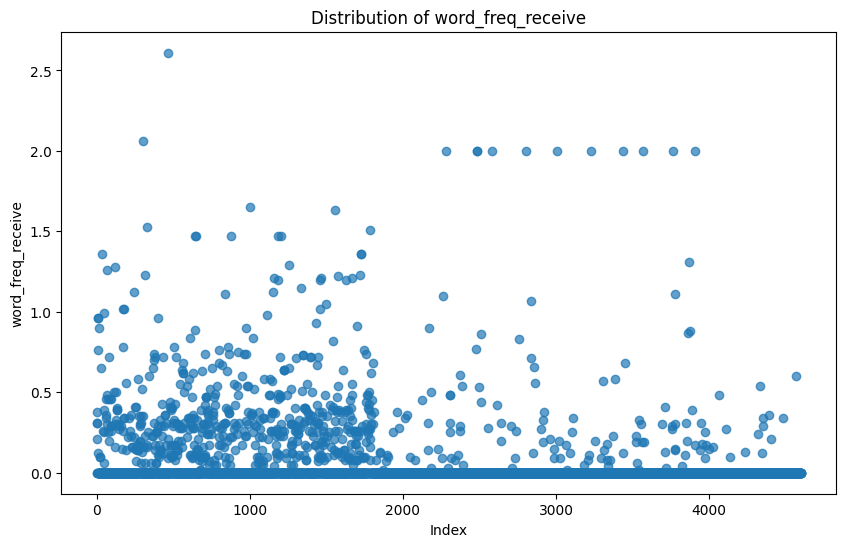

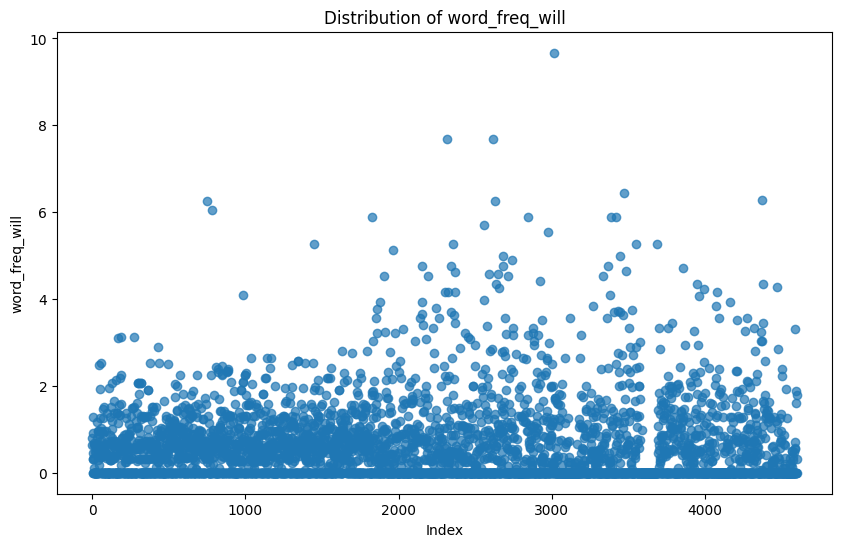

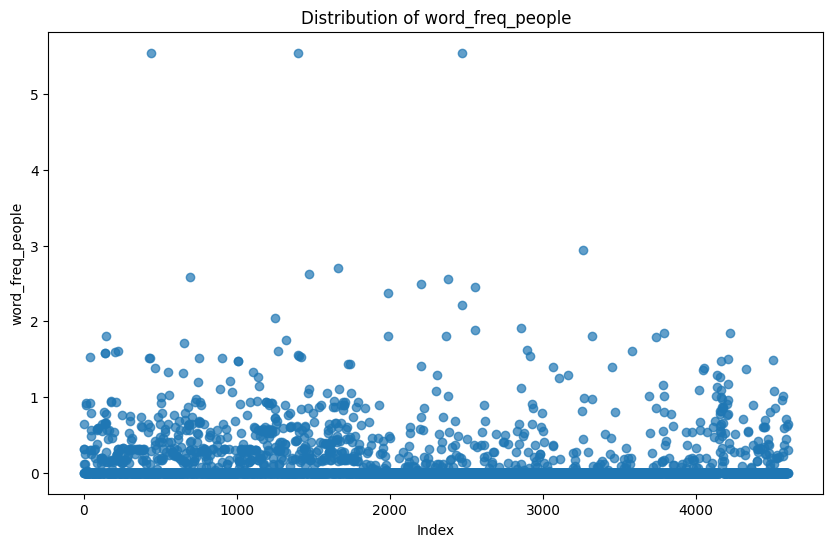

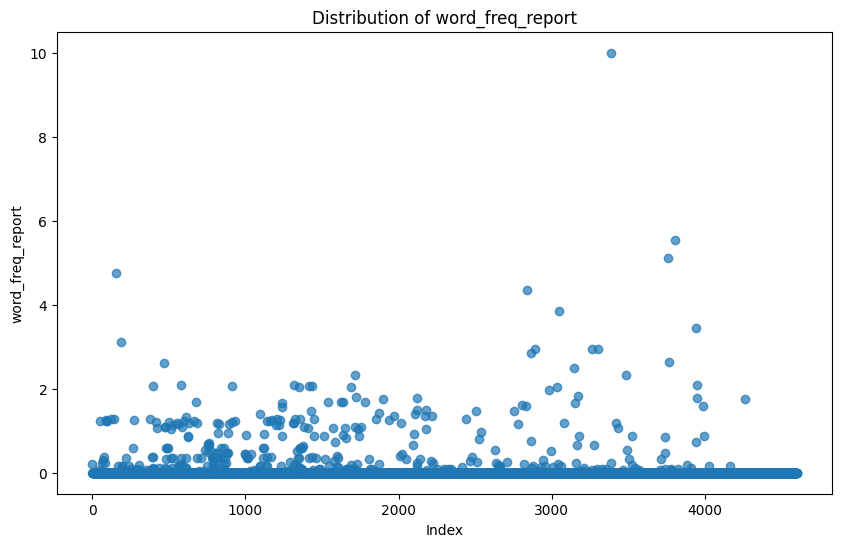

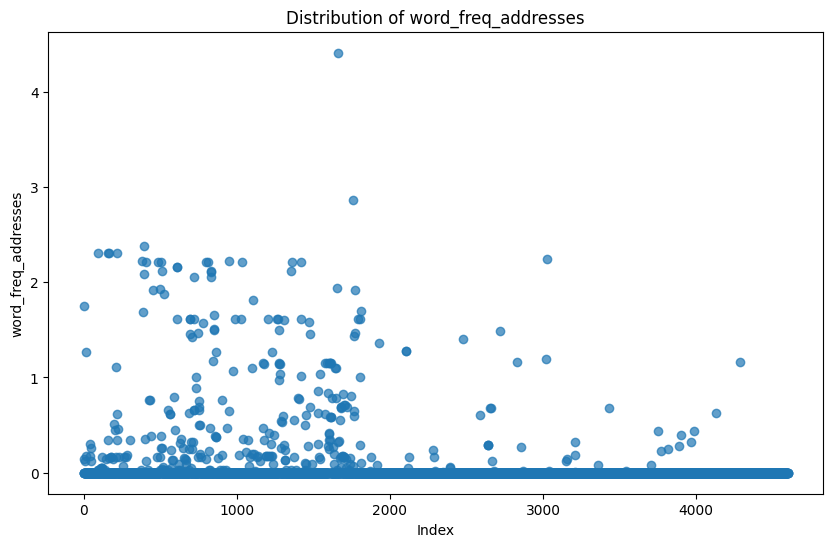

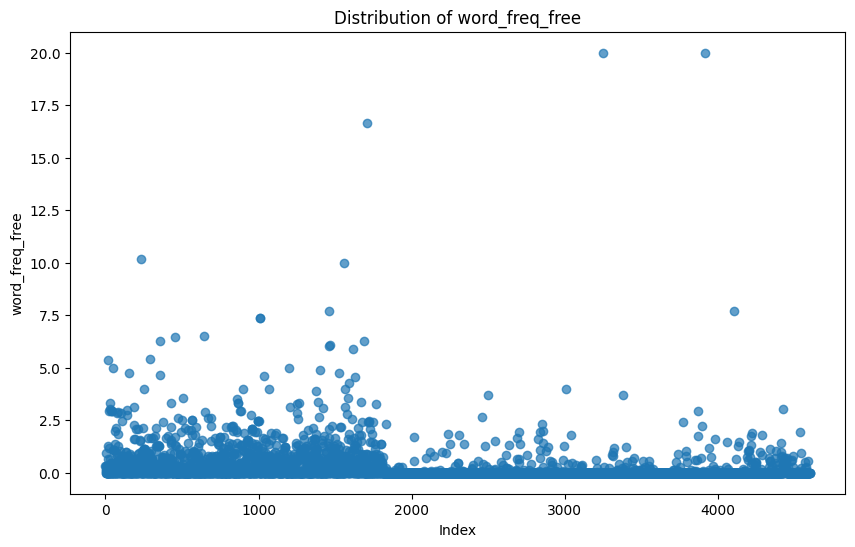

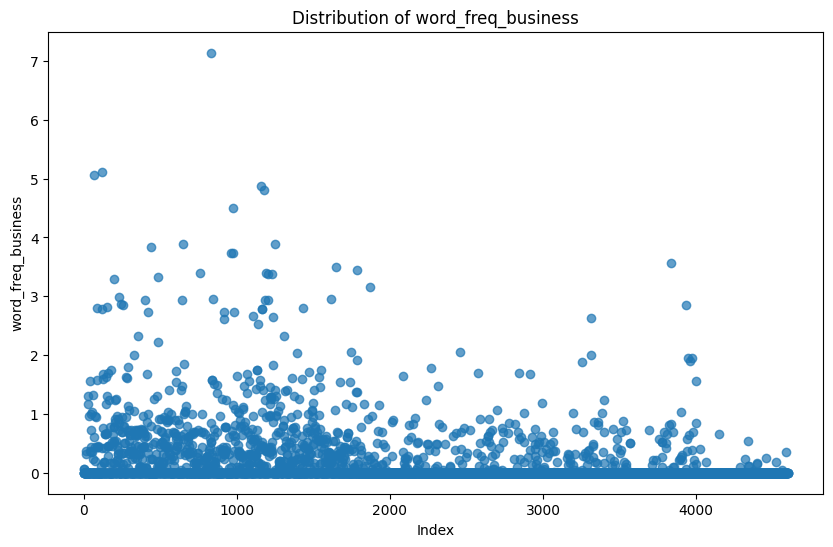

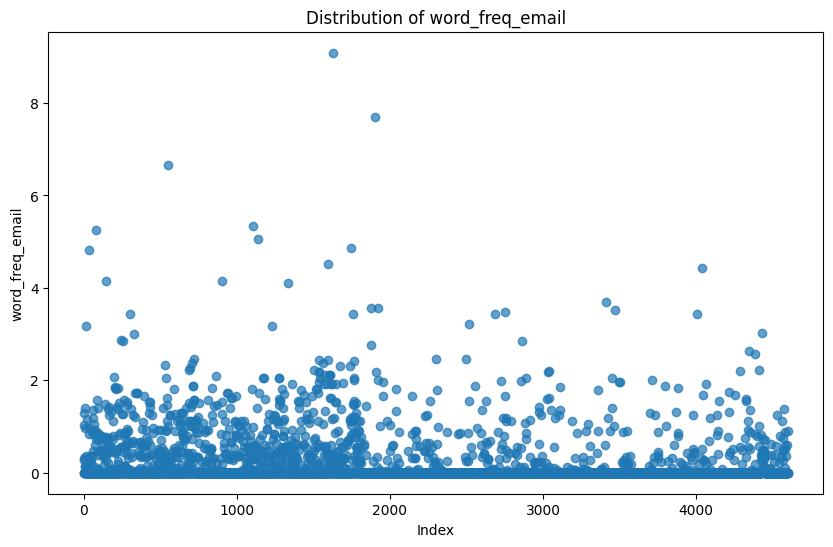

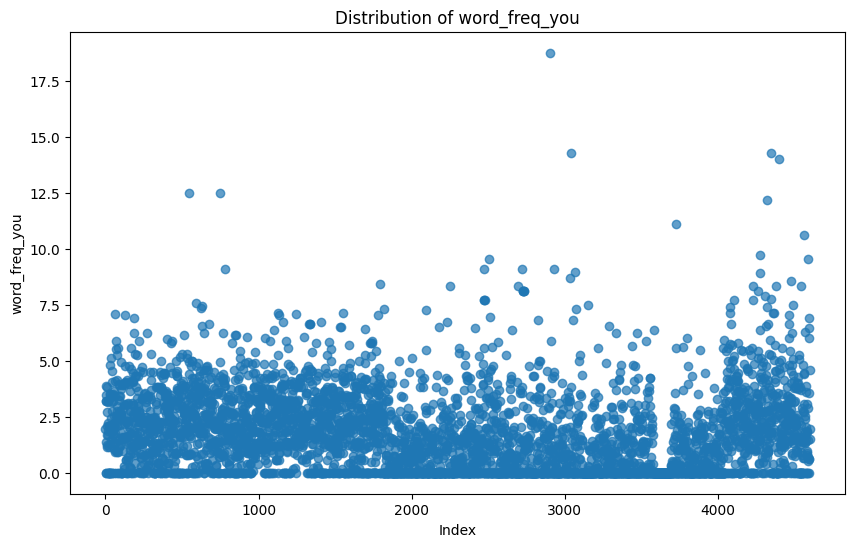

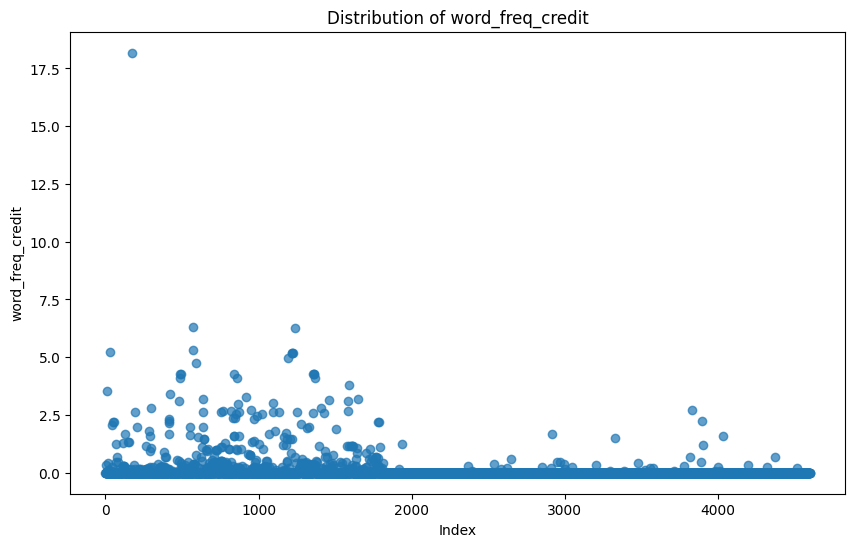

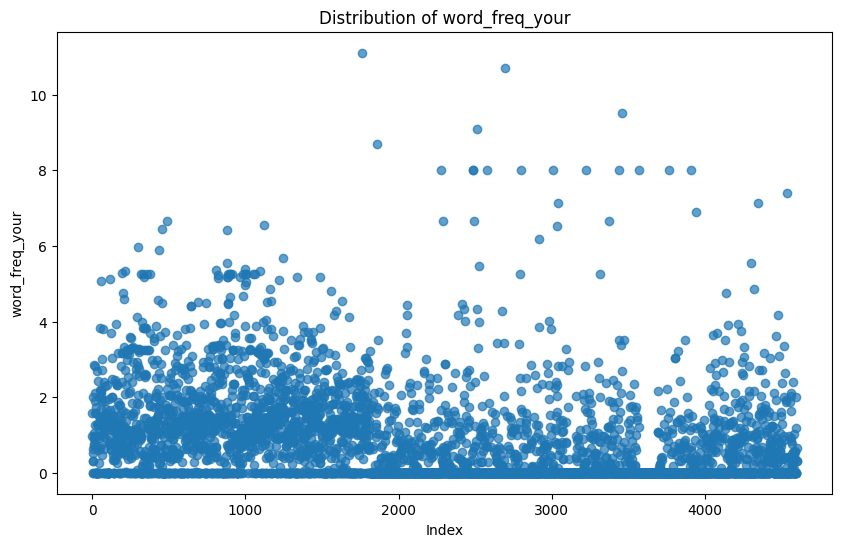

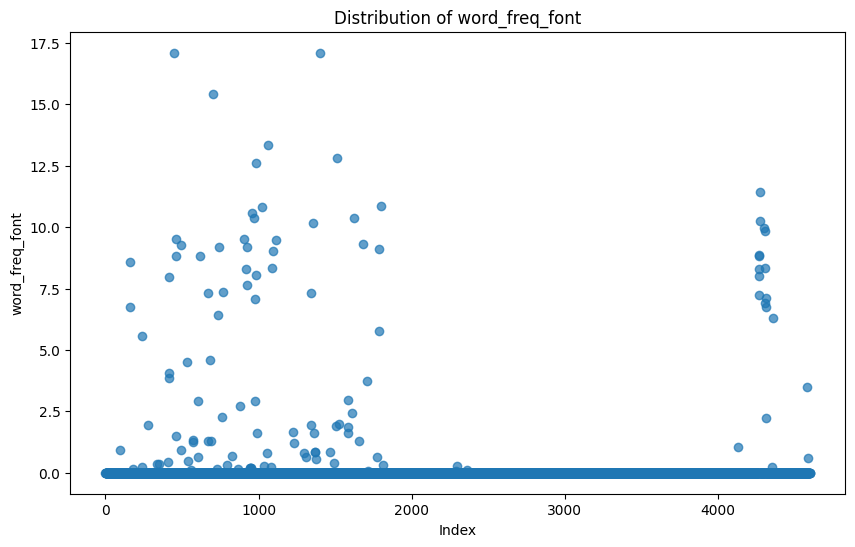

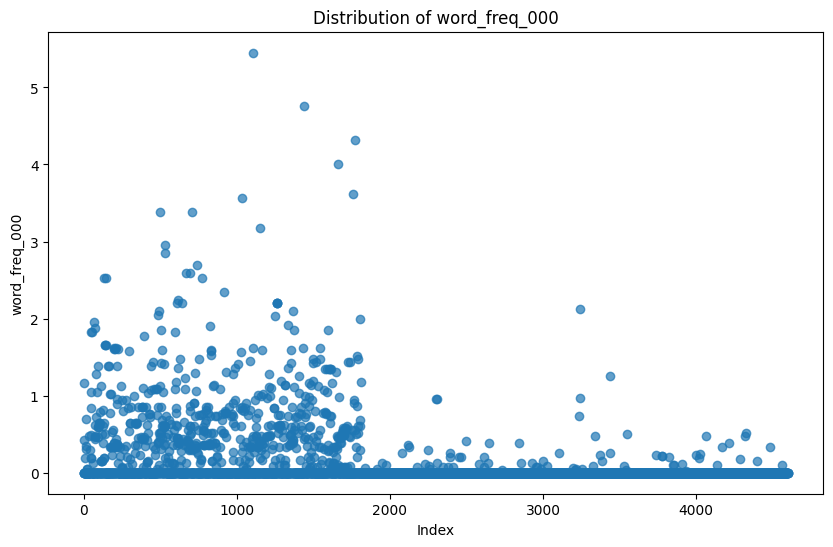

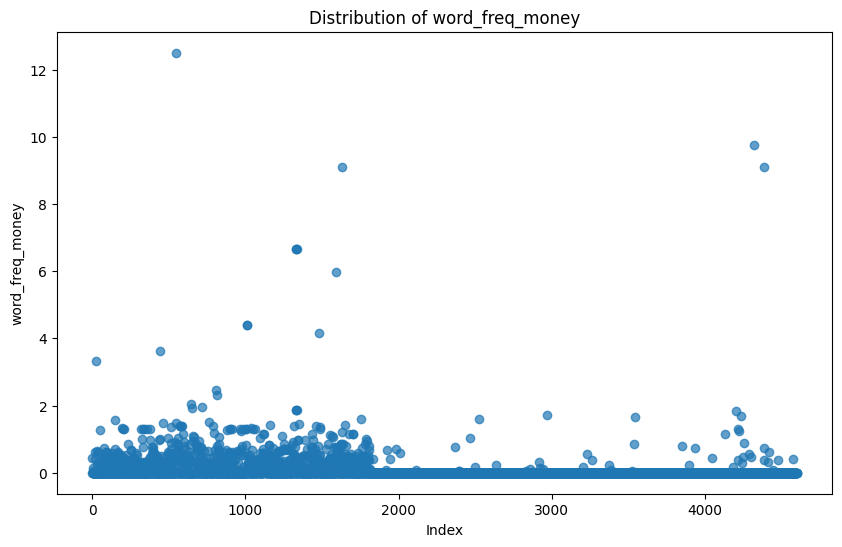

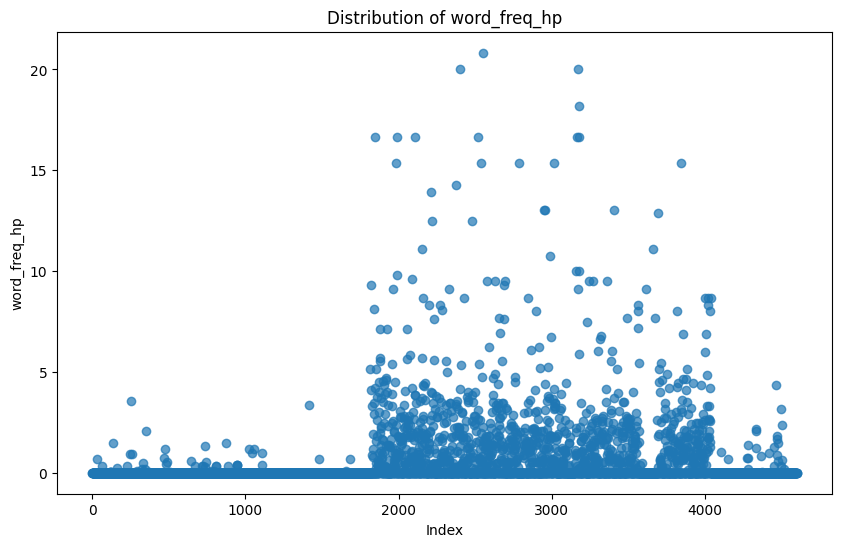

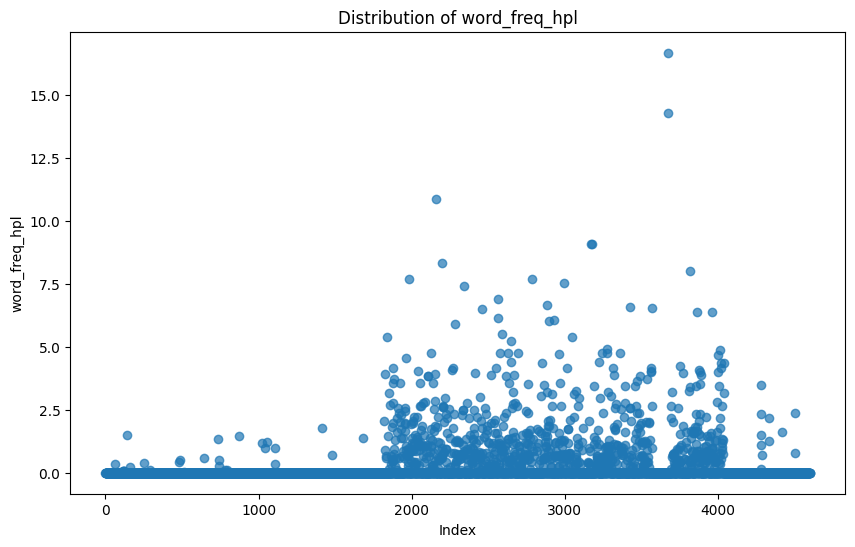

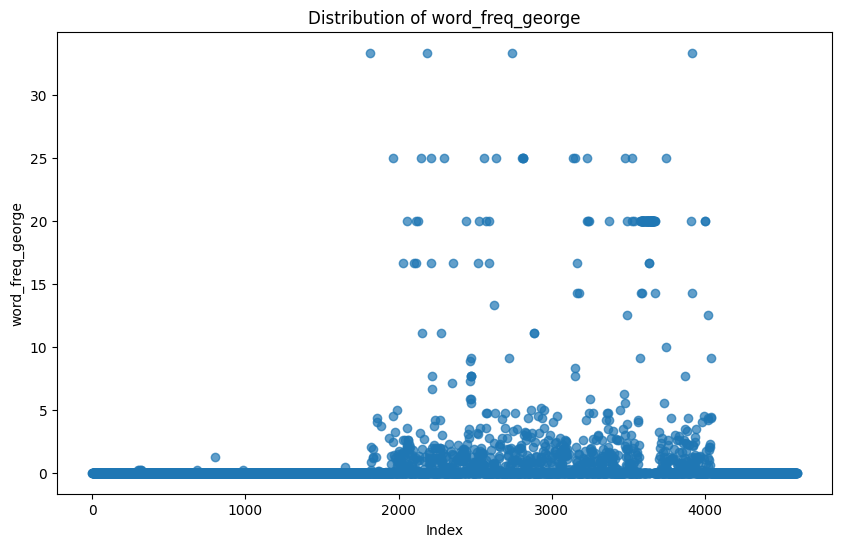

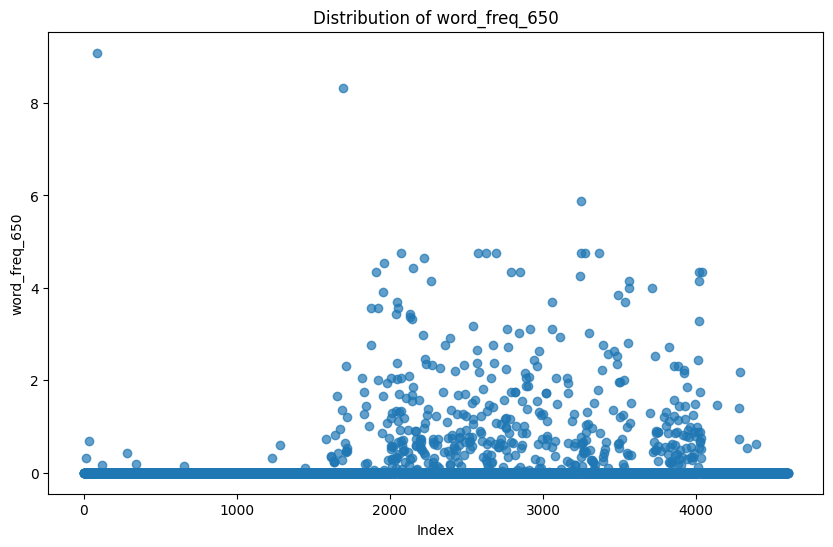

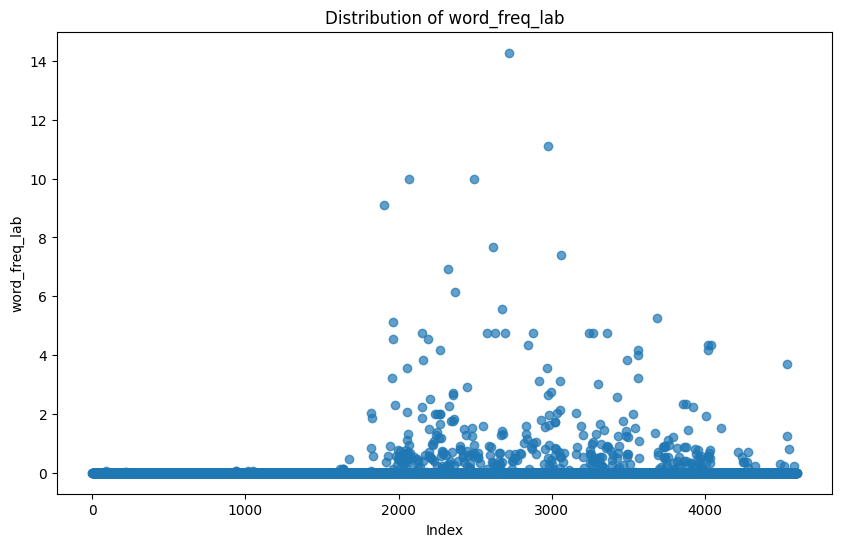

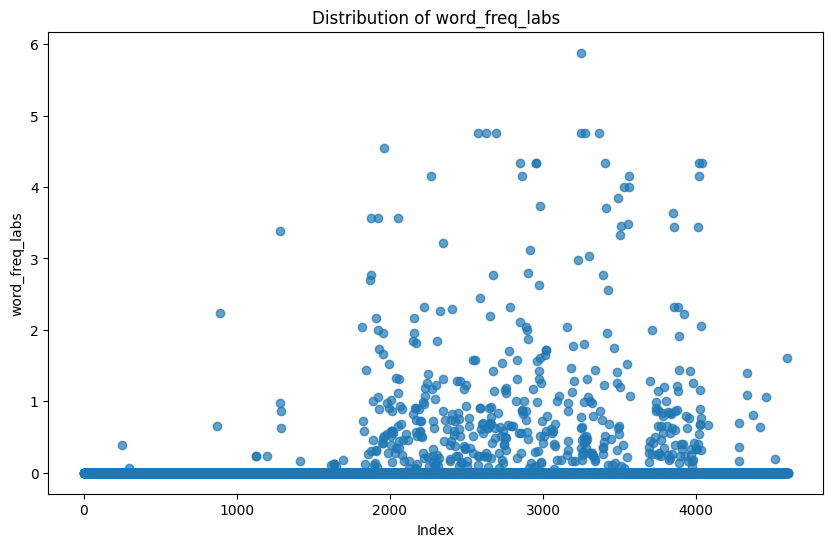

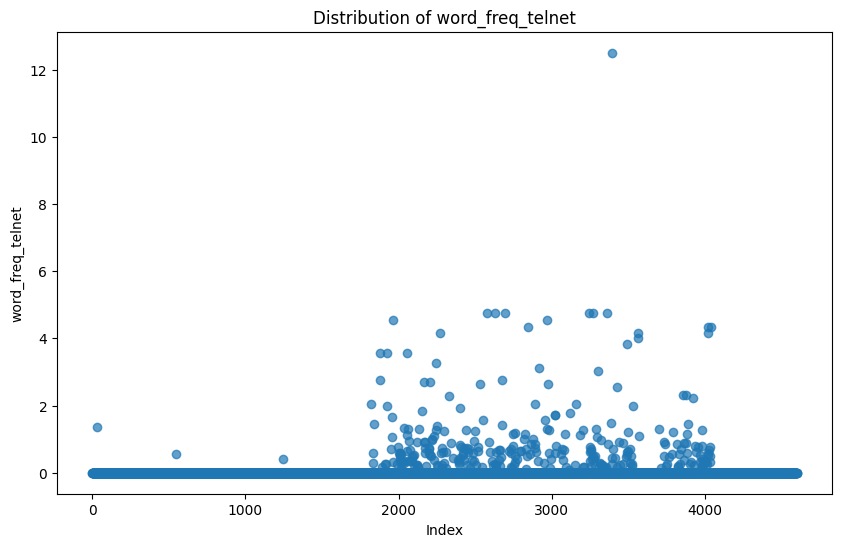

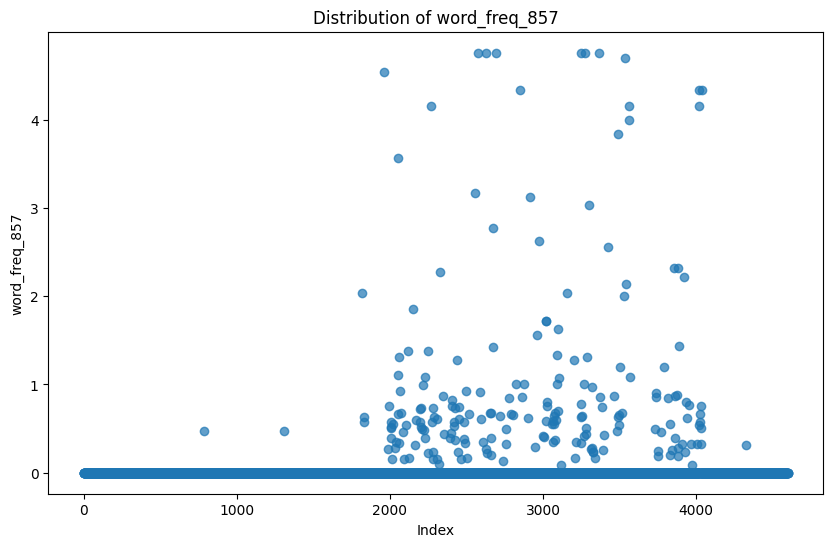

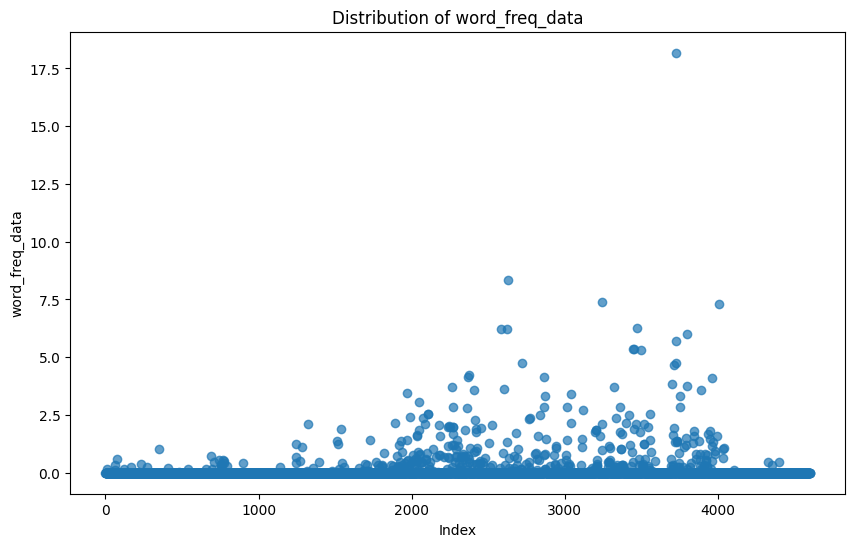

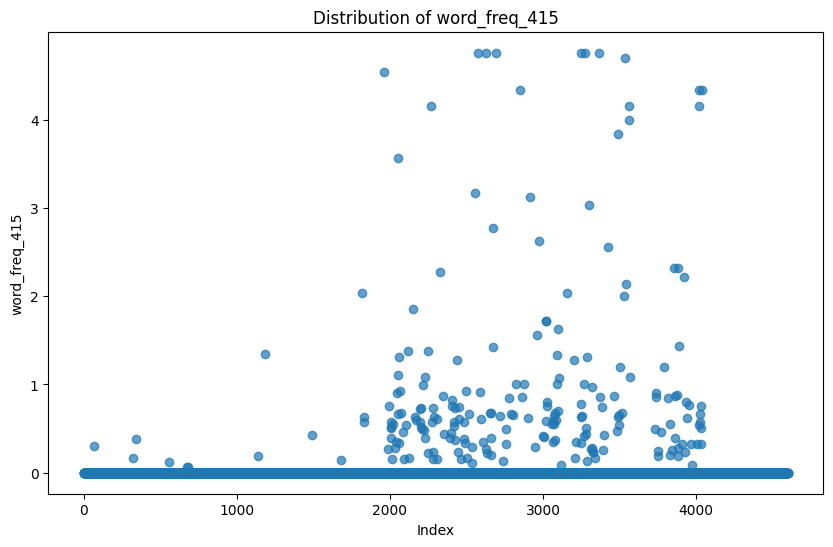

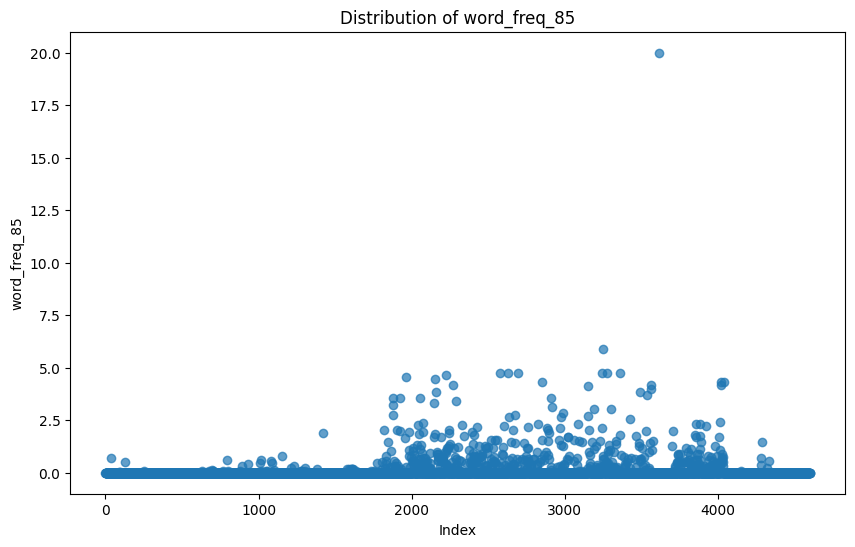

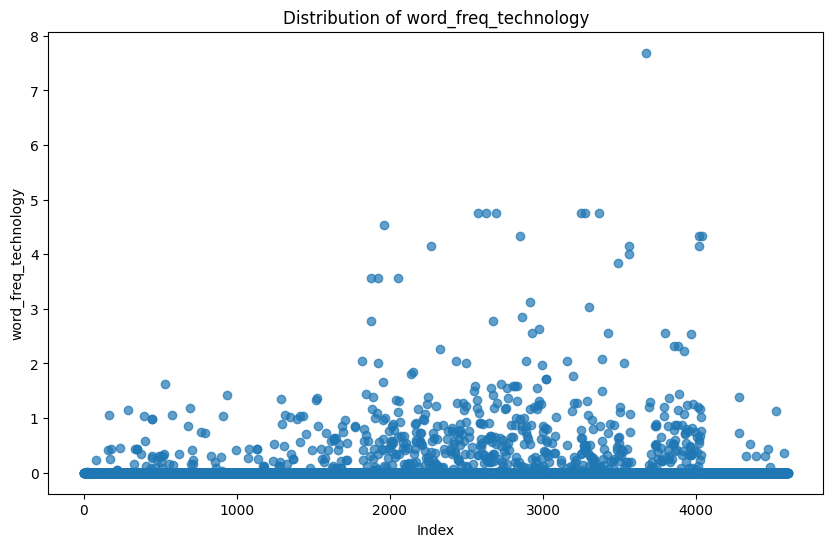

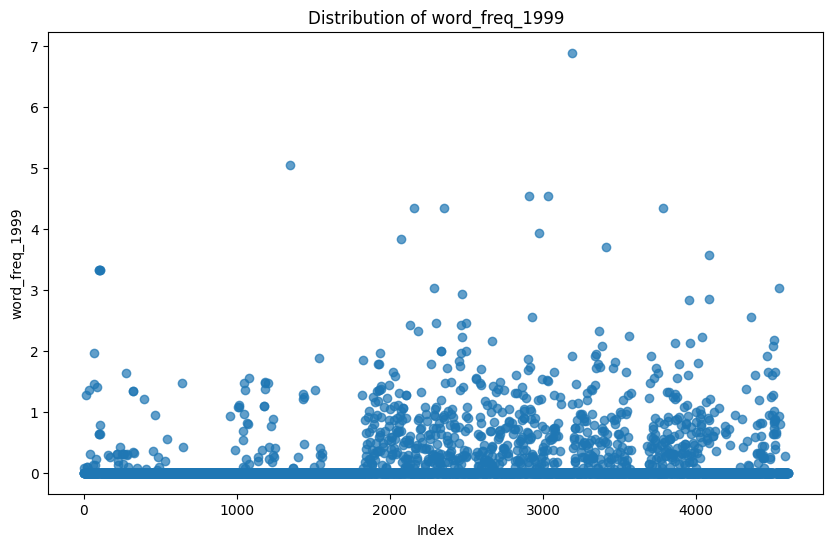

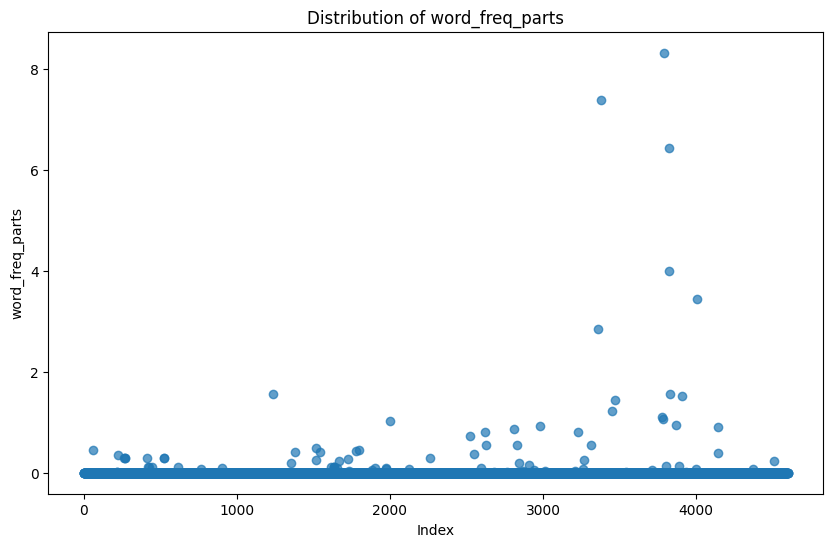

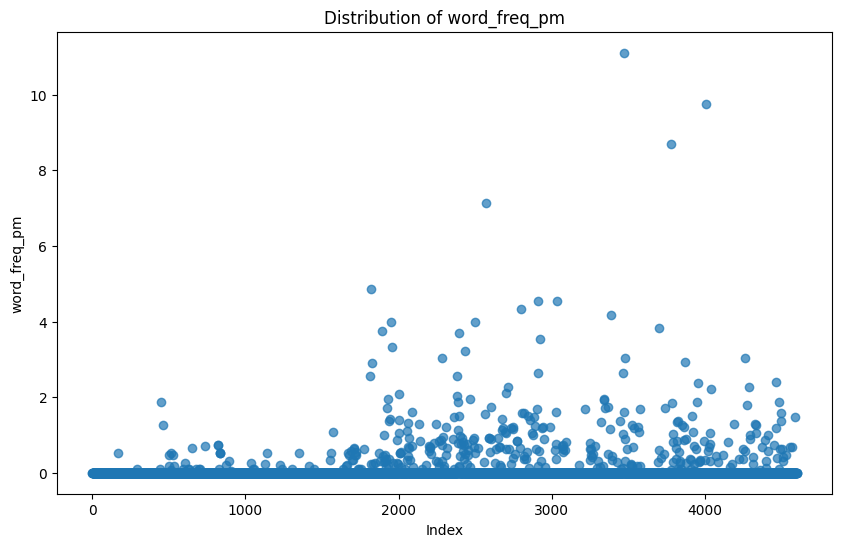

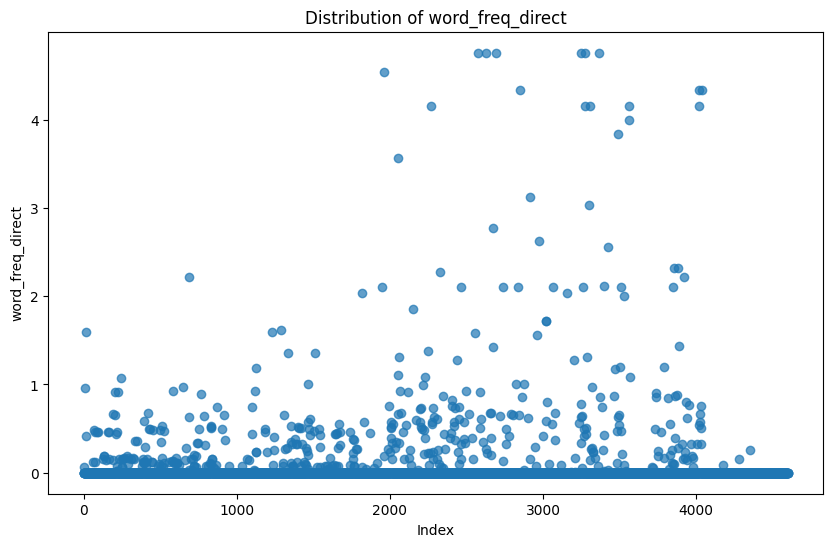

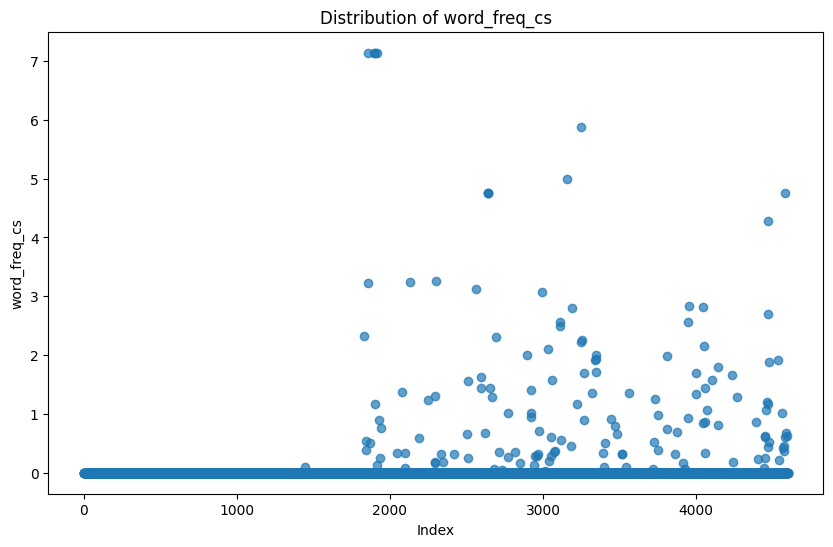

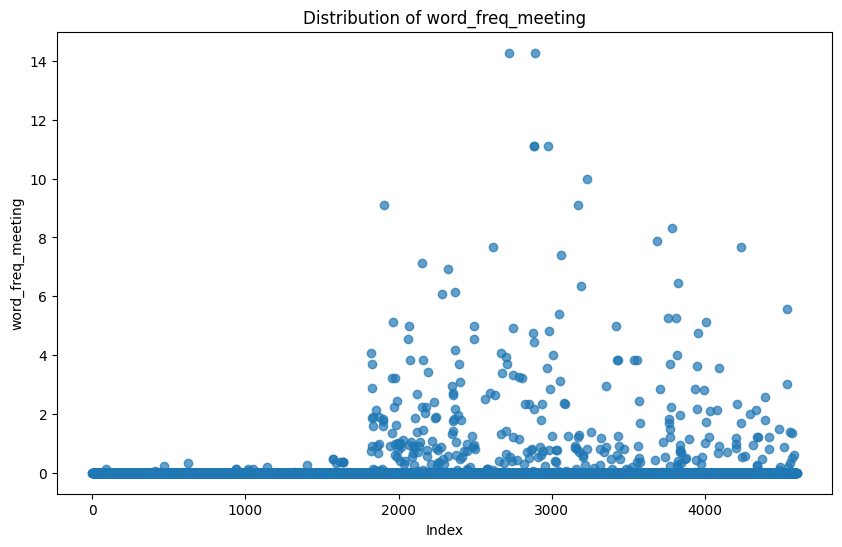

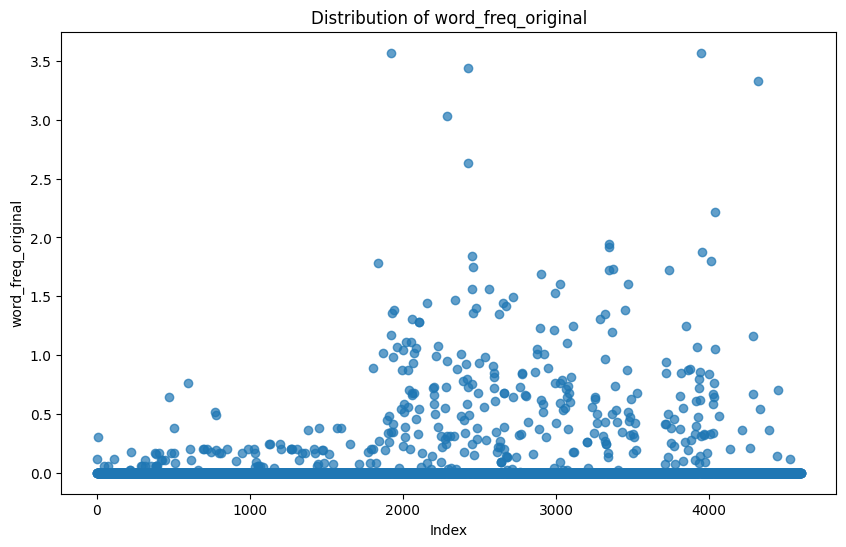

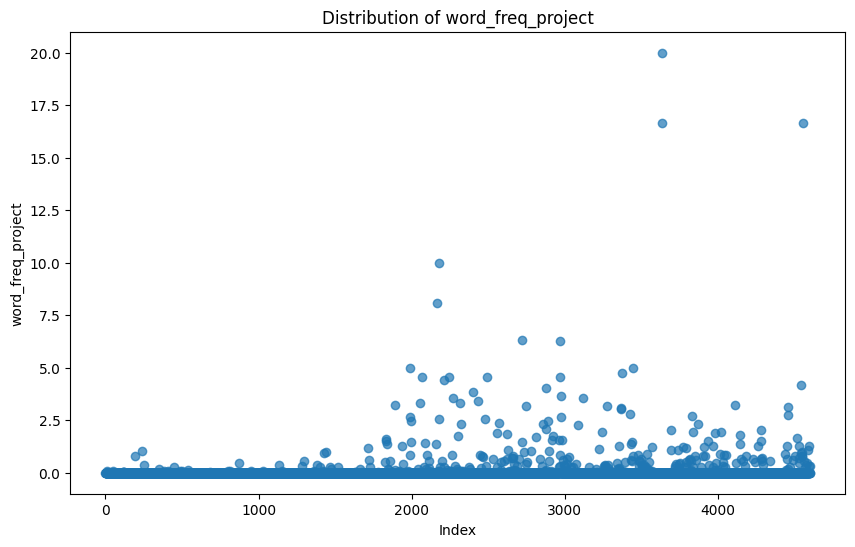

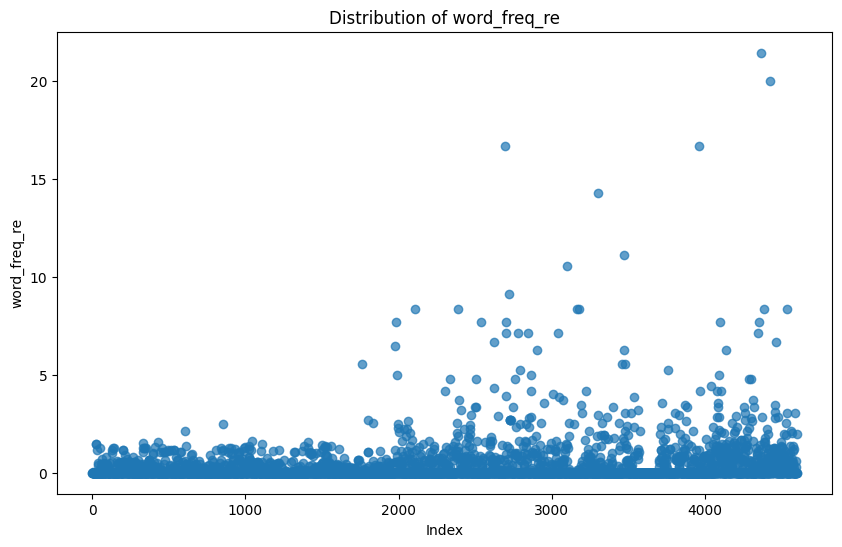

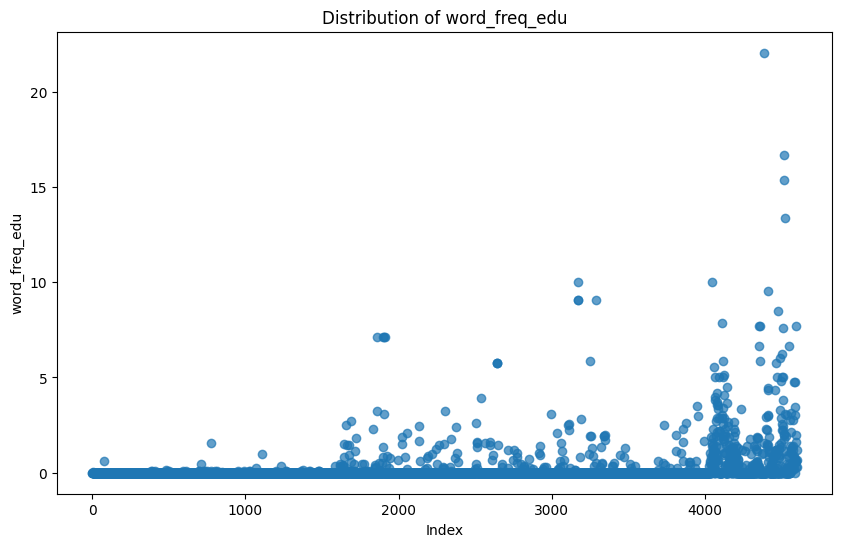

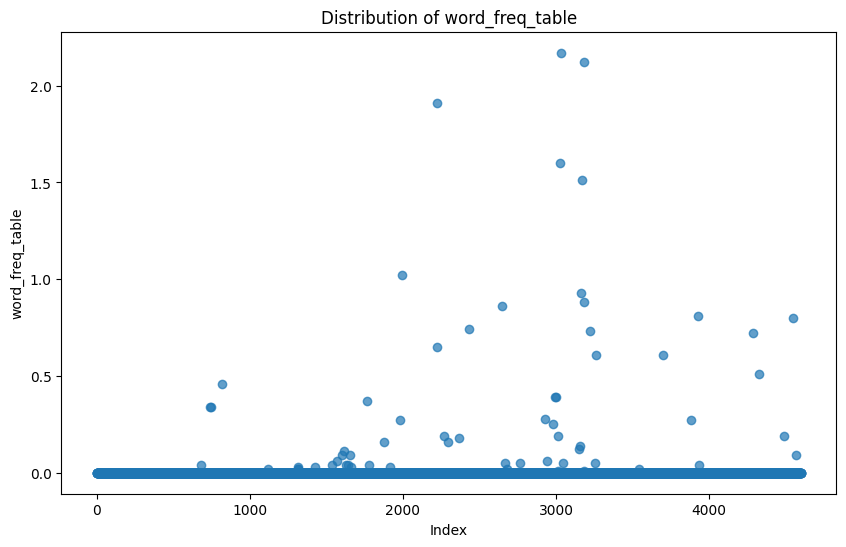

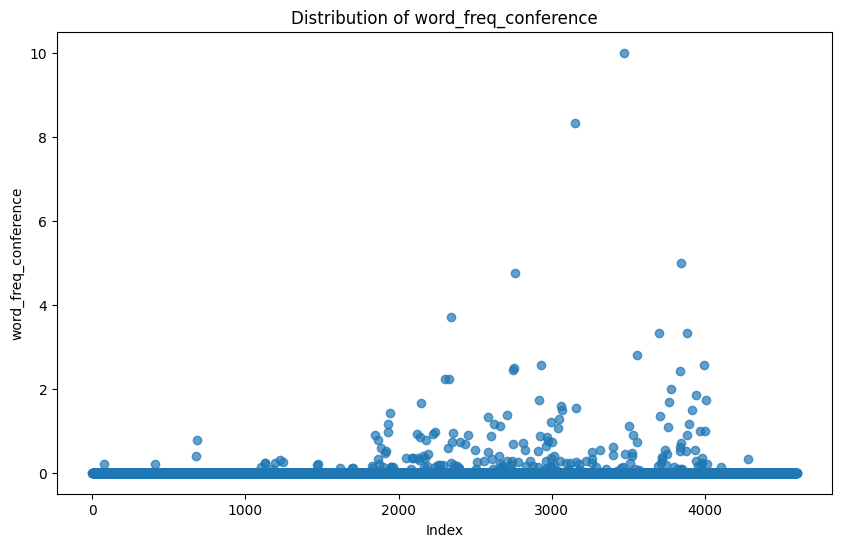

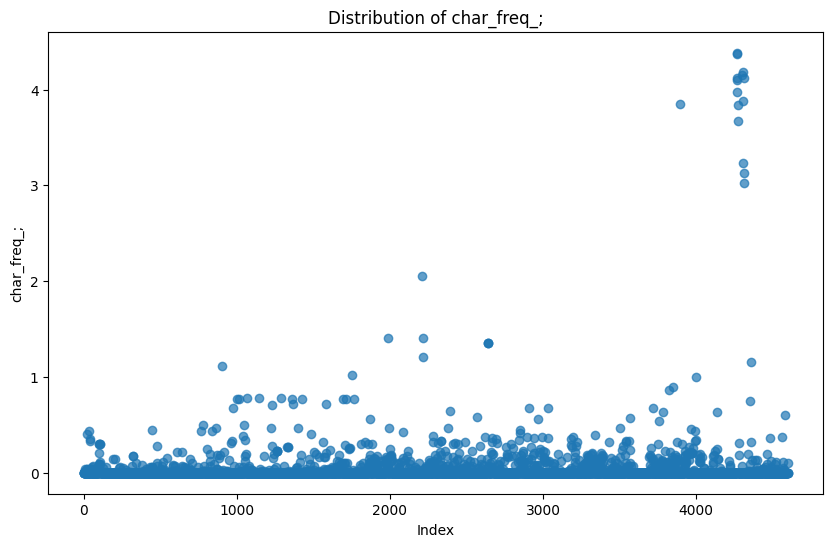

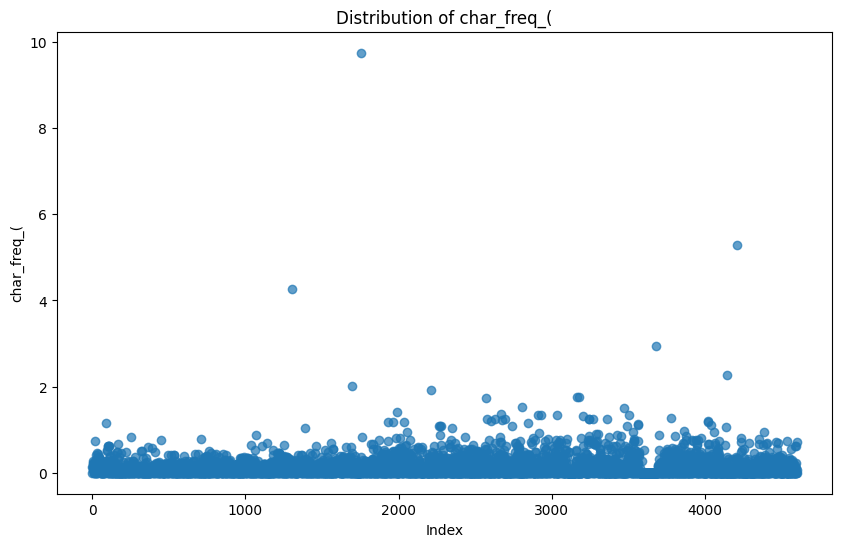

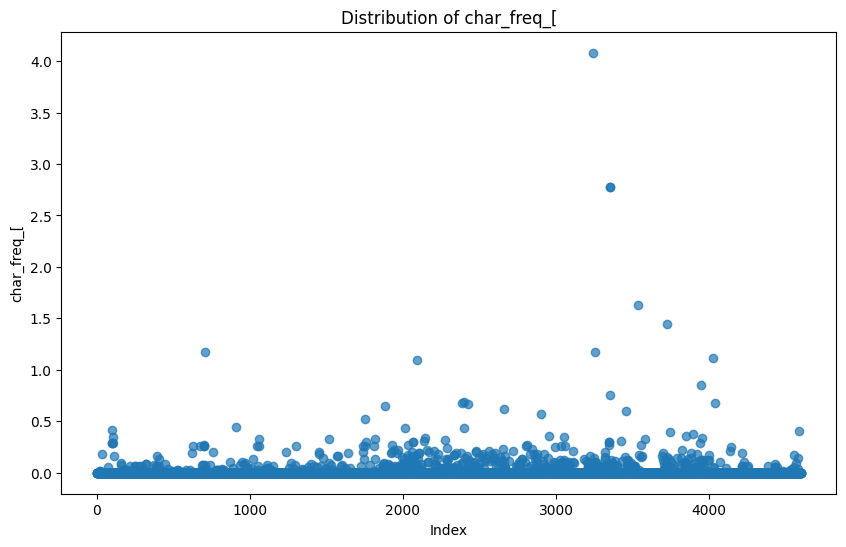

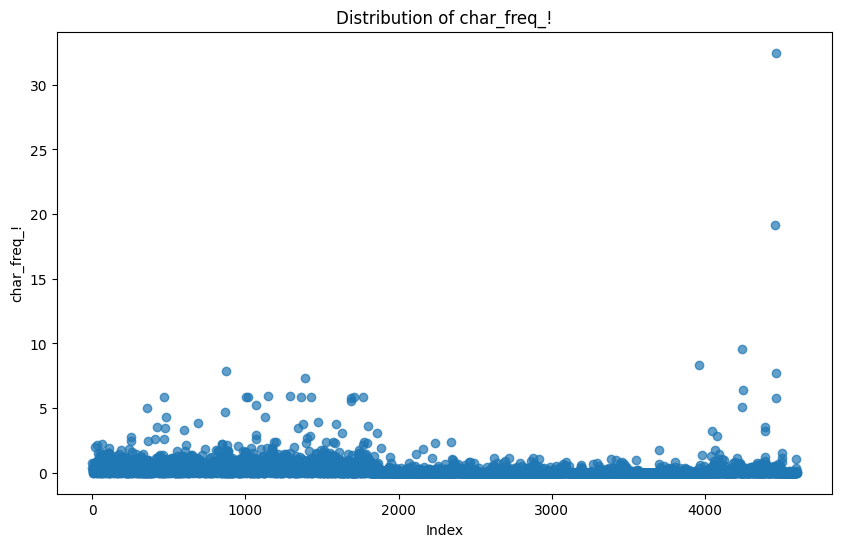

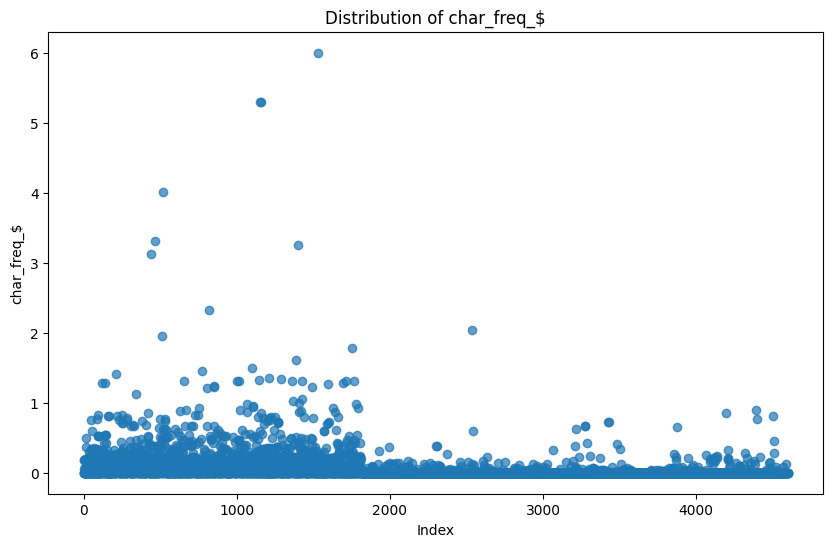

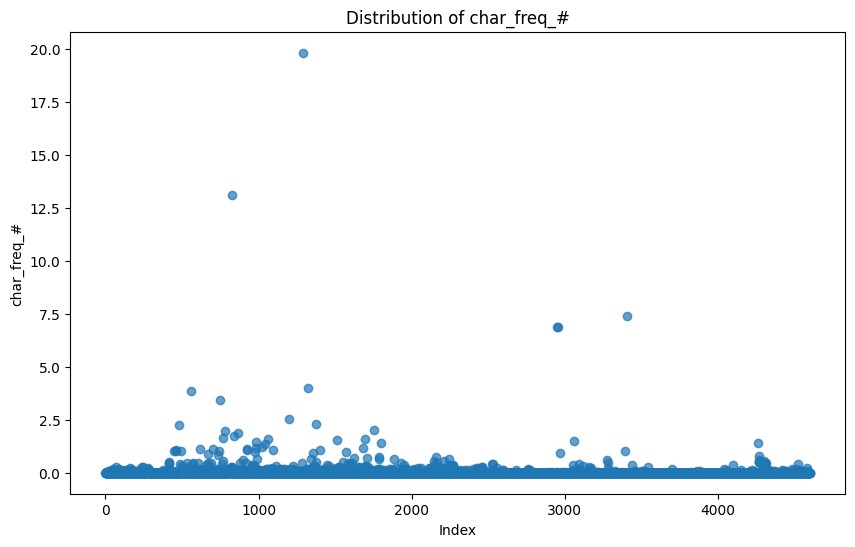

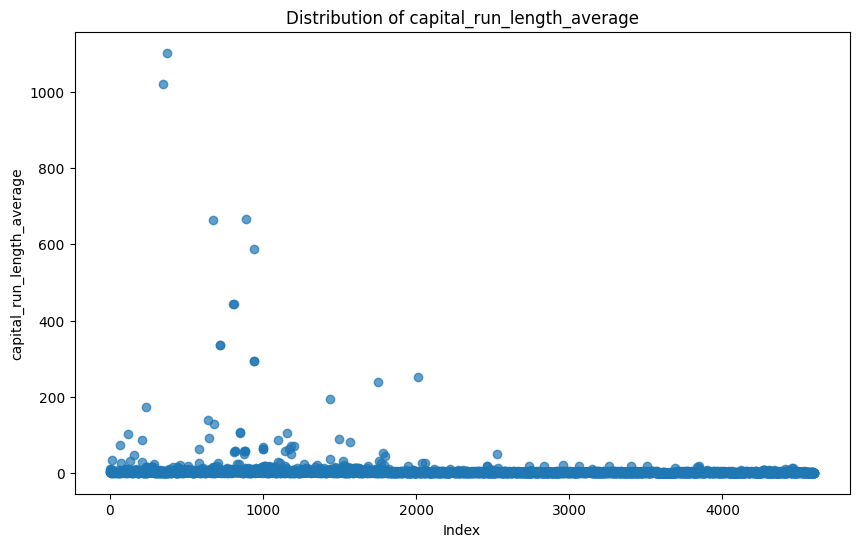

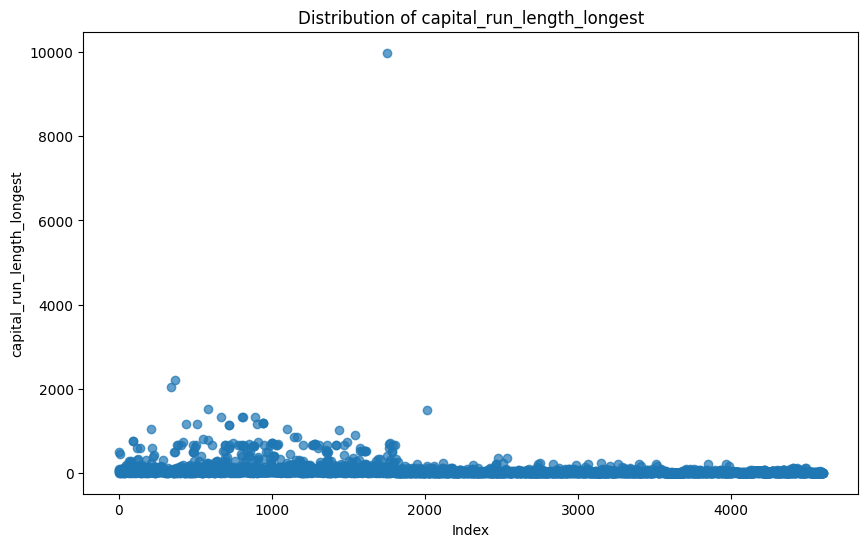

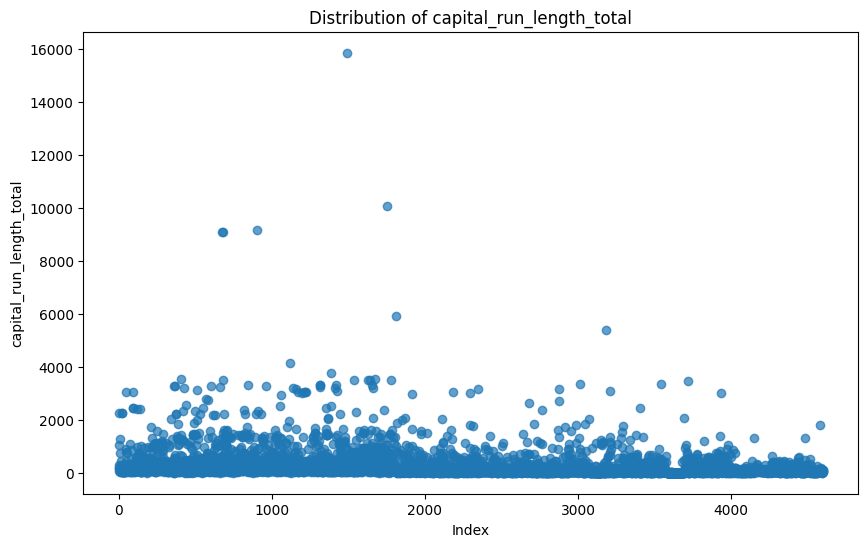

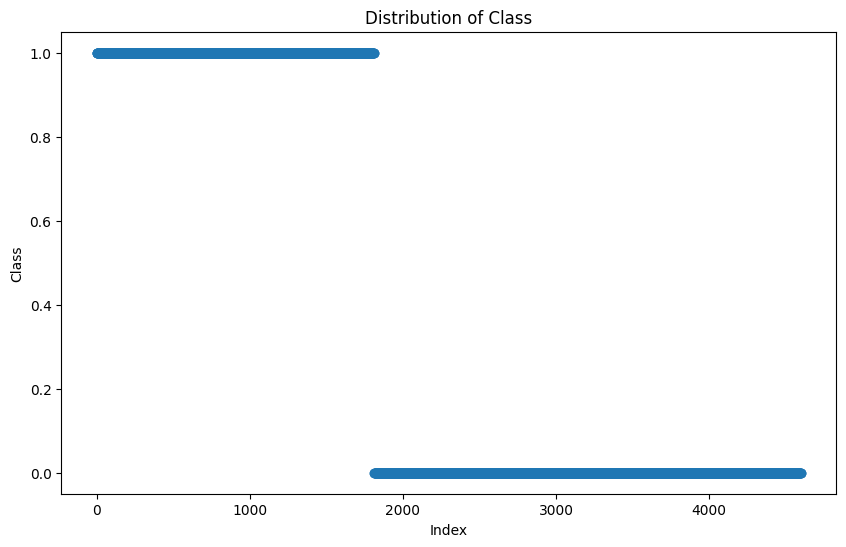

In [10]:
# Visualizing the distribution of each feature using scatter plots
for feature in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df)), df[feature], alpha=0.7)  # Scatter plot of the feature
    plt.title(f'Distribution of {feature}')  # Title of the plot
    plt.xlabel('Index')  # X-axis label
    plt.ylabel(feature)  # Y-axis label
    plt.show()  # Display the plot

#### **3. Feature Engineering**

**Prepare the features set and target variable**

In [11]:
# Select rows where the "Class" column contains NaN values
df[df["Class"].isna()]

Empty DataFrame
Columns: [word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp, word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs, word_freq_telnet, word_freq_857, word_freq_data, word_freq_415, word_freq_85, word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm, word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original, word_freq_project, word_freq_re, word_freq_edu, word_freq_table, word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#, capital_run_length_average, capital_run_length_longest, capital_run_length_total, Class]
Index: []

[0 rows x 58 columns]

In [12]:
# Calculate the proportion of missing values for each numerical column in the DataFrame
df[numerical].isna().mean()

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

In [13]:
# check data types in DataFrame
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [14]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df[numerical].describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
count      4601.000000     4601.000000  ...  4601.000000  4601.000000   
mean          0.090067        0.239413  ...     0.038575     0.139030   
std           0.278616        0.644755  ...     0.243471     0.270355   
min           0.000000        0.000000  ...     0.000000     0.000000   
25%           0.000000        0.000000  ...     0.000000     0.000000   
50%           0.000000        0.000000  ...     0.000000     0.065000   
75%           0.000000        0.160000  ...     0.000000     0.188000   
max           5.260000       18.180000  ...     4.385000     9.752000   

       char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
count  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.016976     0.269071     0.075811     0.044238   
std       0.109394     0.815672     0.245882     0.429342   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.315000     0.052000     0.000000   
max       4.081000    32.478000     6.003000    19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 4601.000000                 4601.000000   
mean                     5.191515                   52.172789   
std                     31.729449                  194.891310   
min                      1.000000                    1.000000   
25%                      1.588000                    6.000000   
50%                      2.276000                   15.000000   
75%                      3.706000                   43.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total        Class  
count               4601.000000  4601.000000  
mean                 283.289285     0.394045  
std                  606.347851     0.488698  
min                    1.000000     0.000000  
25%                   35.000000     0.000000  
50%                   95.000000     0.000000  
75%                  266.000000     1.000000  
max                15841.000000     1.000000  

[8 rows x 58 columns]

In [15]:
# Extracting only the numerical columns from the DataFrame and storing it in a new DataFrame
df_numeric = df[numerical]

In [16]:
# Ensure the presence of the 'Class' column before proceeding
if 'Class' not in df.columns:
    raise KeyError("The 'Class' column is not present in the DataFrame")

# Select rows where the "Class" column contains NaN values
class_nan_rows = df[df["Class"].isna()]
print("Class NaN Rows:\n", class_nan_rows)

Class NaN Rows:
 Empty DataFrame
Columns: [word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp, word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs, word_freq_telnet, word_freq_857, word_freq_data, word_freq_415, word_freq_85, word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm, word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original, word_freq_project, word_freq_re, word_freq_edu, word_freq_table, word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#, capital_run_length_average, capital_run_length_longest, capital_run_lengt

In [17]:
# Calculate the proportion of missing values for each numerical column in the DataFrame
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
missing_proportion = df[numerical].isna().mean()
print("Missing Proportion:\n", missing_proportion)

Missing Proportion:
 word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab              

In [18]:
# Generate descriptive statistics for the numerical columns in the DataFrame
print("Descriptive Statistics:\n", df[numerical].describe())

Descriptive Statistics:
        word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min  

In [19]:
# Extracting only the numerical columns from the DataFrame and storing it in a new DataFrame
df_numeric = df[numerical].copy()


In [20]:
# Function to calculate outliers' bounds using Interquartile Range (IQR)
def calculate_outliers_bound(df: pd.DataFrame, col: str) -> (float, float):
    """
    Calculate the lower and upper bounds for outliers detection using Interquartile Range (IQR) method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the numerical column.
        col (str): The name of the numerical column for which outliers bounds are calculated.
        
    Returns:
        (float, float): A tuple containing the lower and upper bounds for outliers detection.
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (lower_bound, upper_bound)


In [21]:
# Detect outliers using the Interquartile Range (IQR) method and replace them with NaN values
outliers_bound = {col: calculate_outliers_bound(df_numeric, col) for col in numerical}
for col in numerical:
    lower_bound, upper_bound = outliers_bound[col]
    df_numeric.loc[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound), col] = np.nan

# Check the number of missing values for each numerical column after outlier detection
print("Missing values before imputation:\n", df_numeric.isna().sum())



Missing values before imputation:
 word_freq_make                1053
word_freq_address              898
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 957
word_freq_business             963
word_freq_email               1038
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_650       

In [22]:
# Using KNNImputer to fill missing values
imputer = KNNImputer()
df_imputed_array = imputer.fit_transform(df_numeric)
df_imputed = pd.DataFrame(df_imputed_array, columns=numerical)

# Add the 'Class' column back to the imputed DataFrame
df_imputed['Class'] = df['Class'].values

# Checking the distribution of the target variable
frequencies = df_imputed['Class'].value_counts()
proportions = df_imputed['Class'].value_counts(normalize=True) * 100
print(frequencies)
print(proportions)

Class
0    2788
1    1813
Name: count, dtype: int64
Class
0    60.595523
1    39.404477
Name: proportion, dtype: float64


In [23]:
# Output the engineered DataFrame for further processing
print("Feature Engineering Complete. Here's the engineered DataFrame:\n", df_imputed.head())


Feature Engineering Complete. Here's the engineered DataFrame:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0             0.0                0.0           0.64           0.0   
1             0.0                0.0           0.50           0.0   
2             0.0                0.0           0.71           0.0   
3             0.0                0.0           0.00           0.0   
4             0.0                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.320             0.0               0.0                 0.0   
1          0.140             0.0               0.0                 0.0   
2          0.578             0.0               0.0                 0.0   
3          0.630             0.0               0.0                 0.0   
4          0.630             0.0               0.0                 0.0   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0      

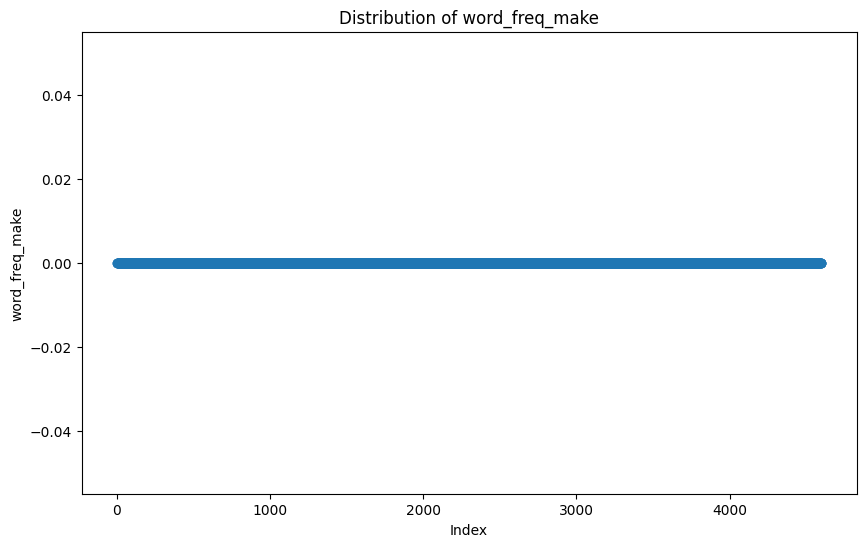

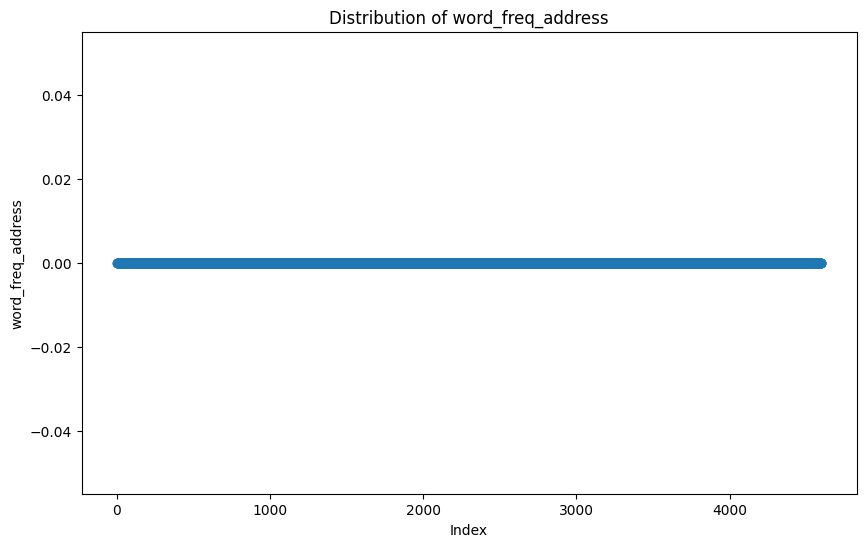

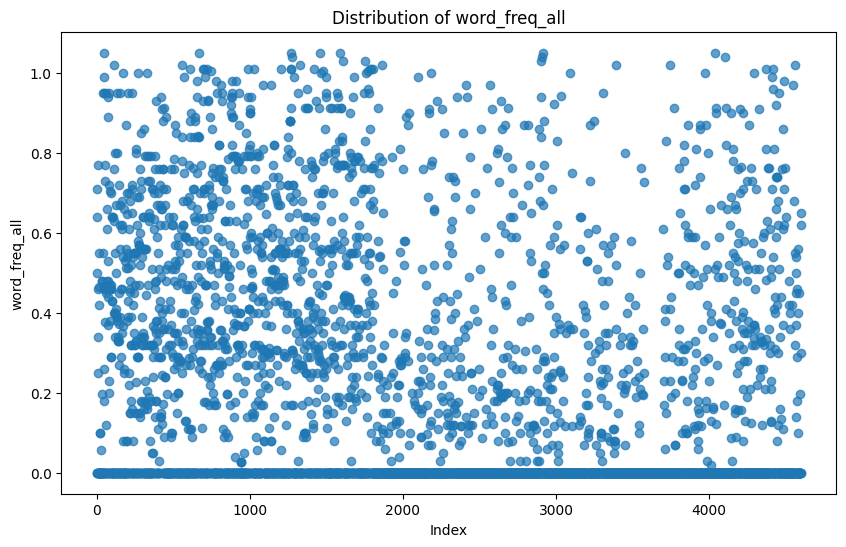

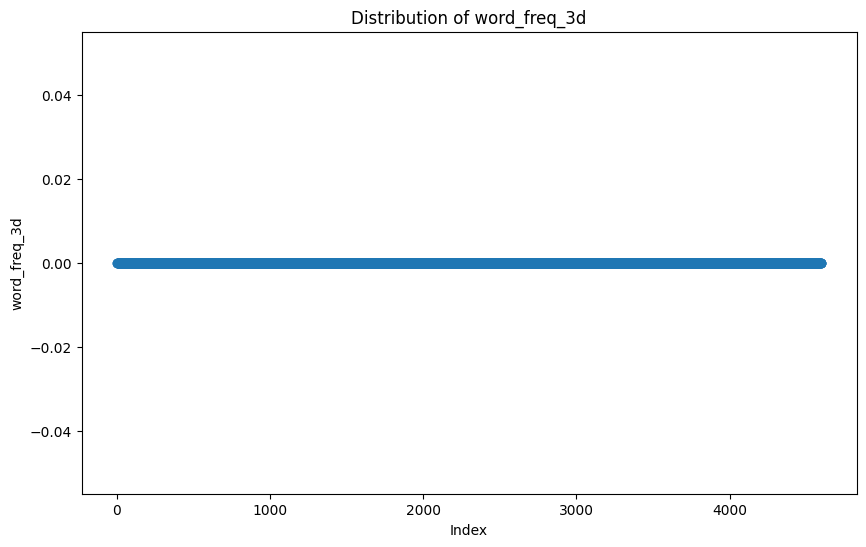

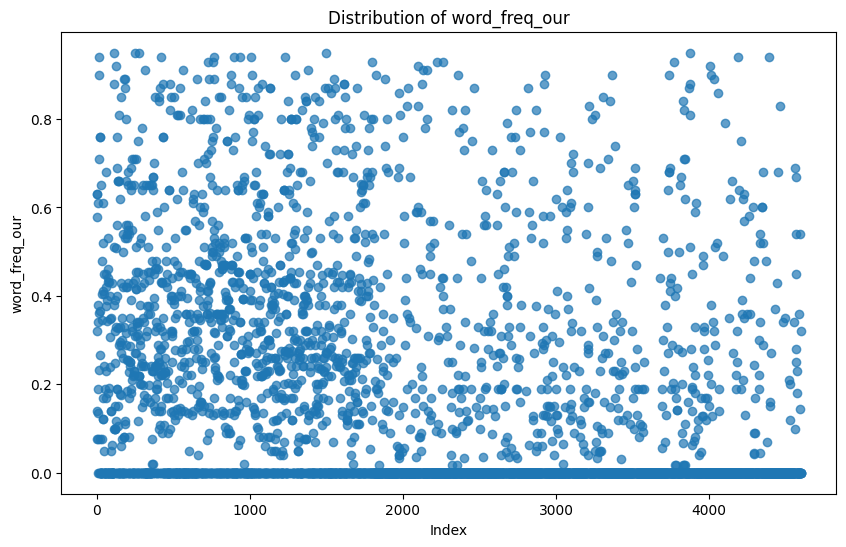

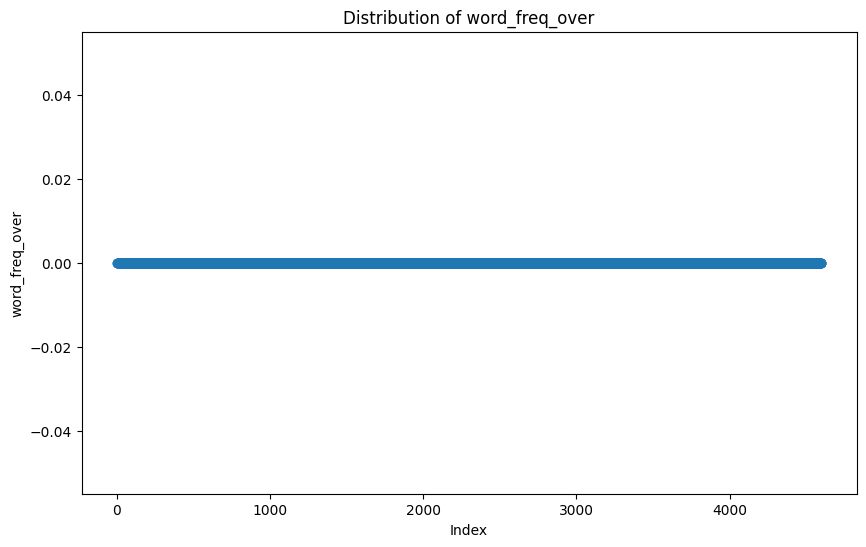

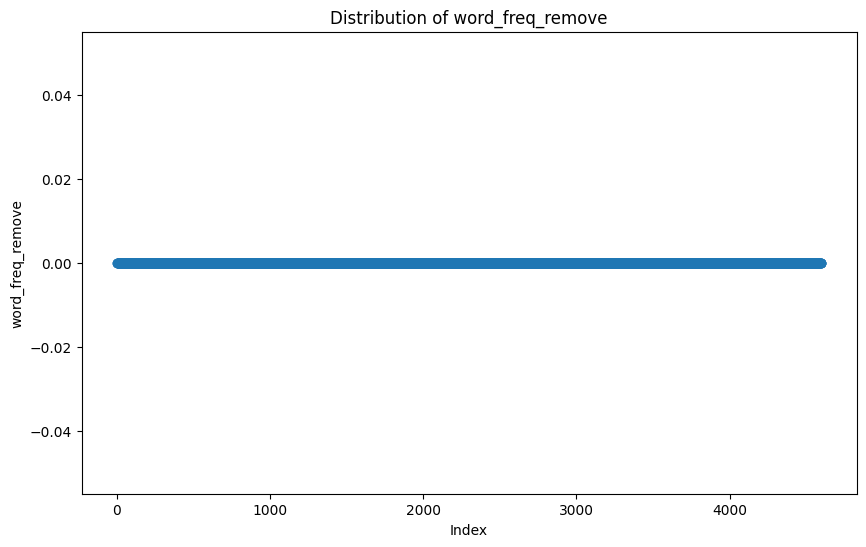

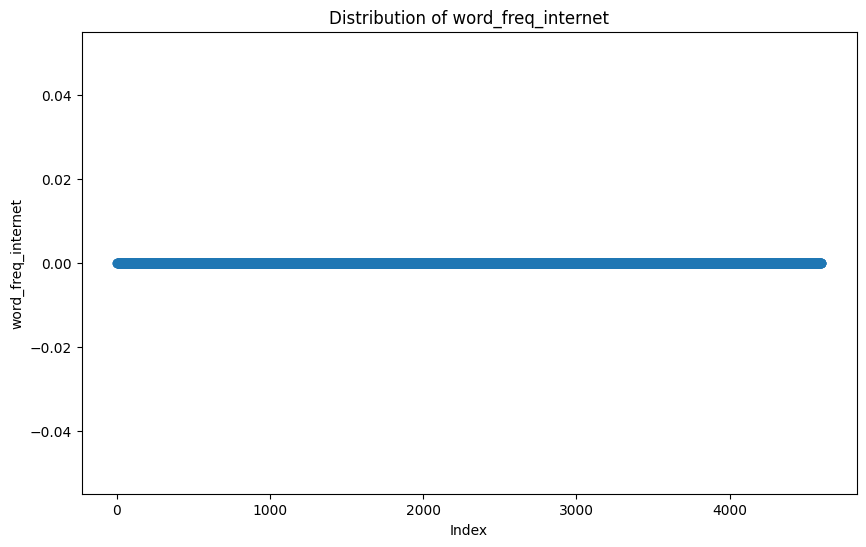

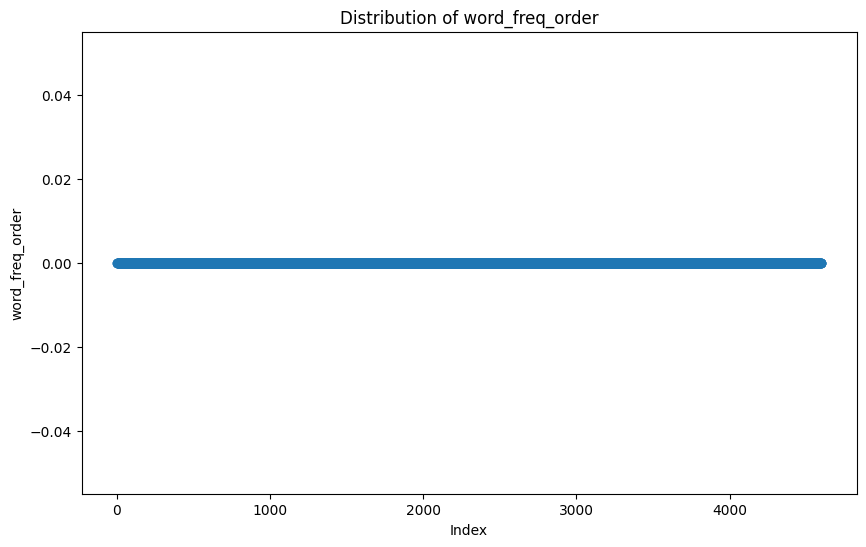

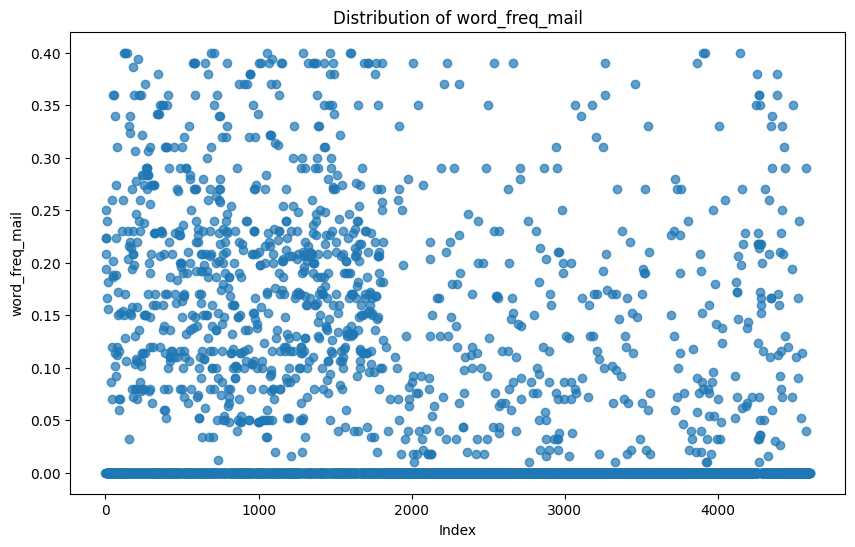

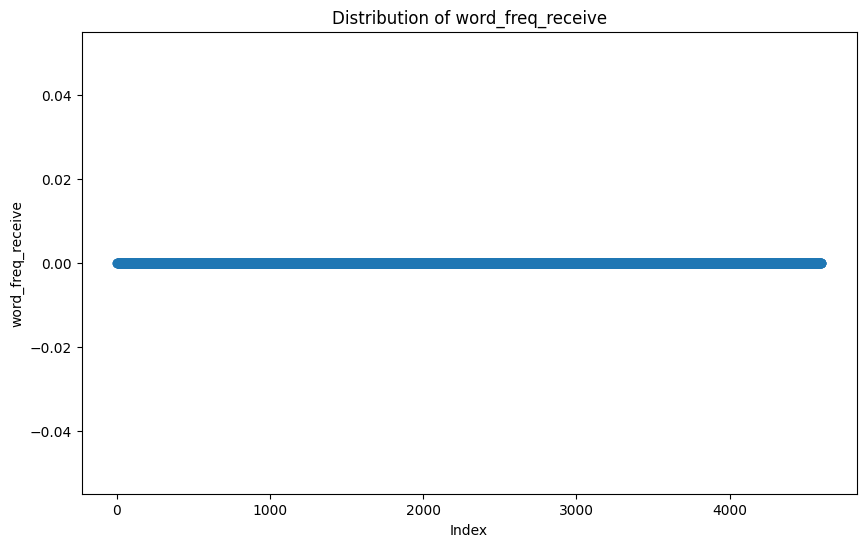

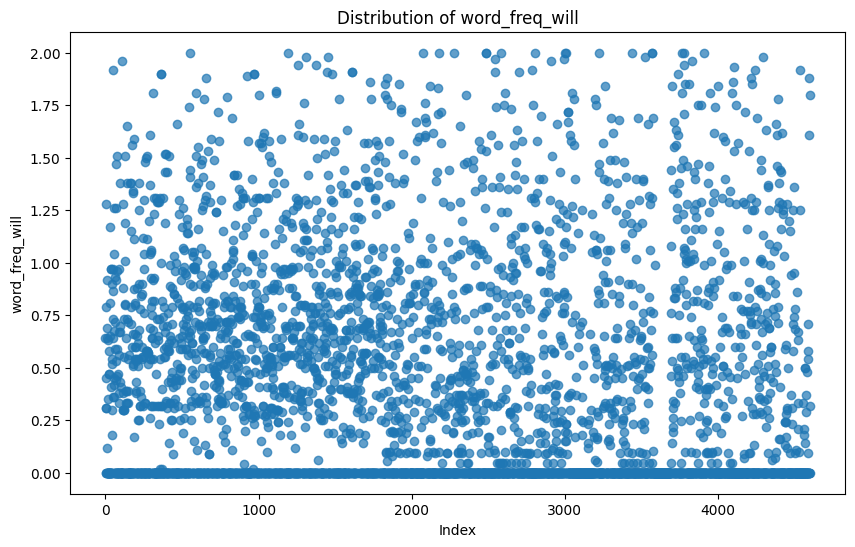

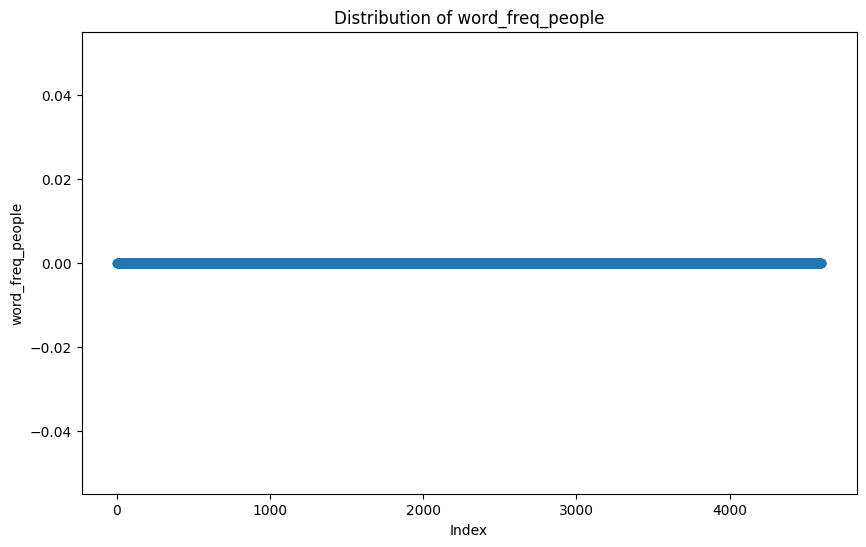

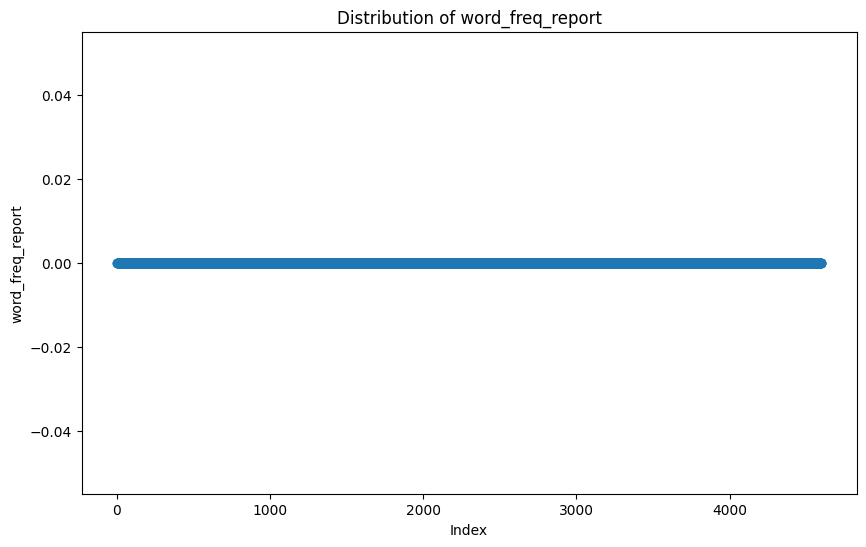

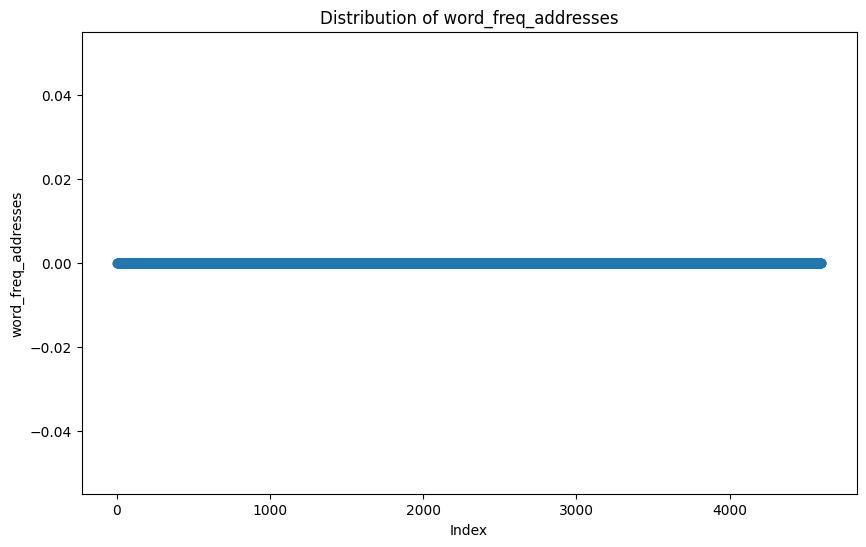

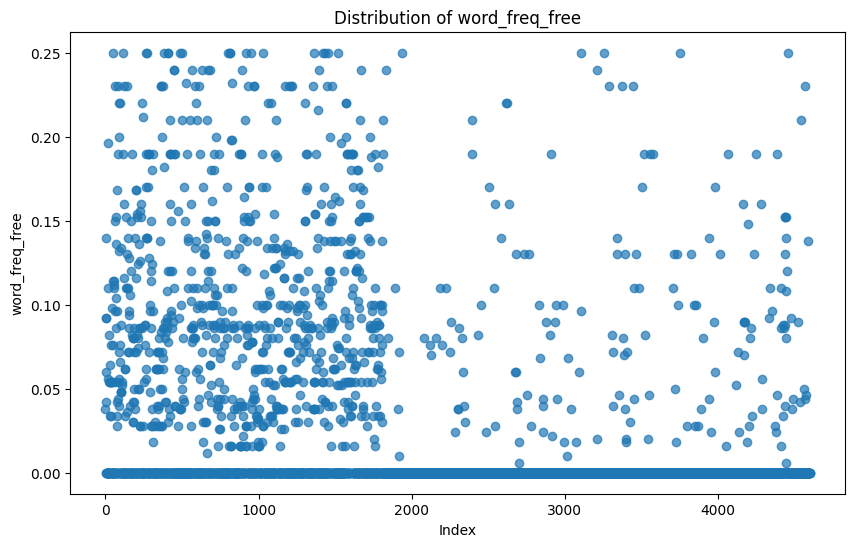

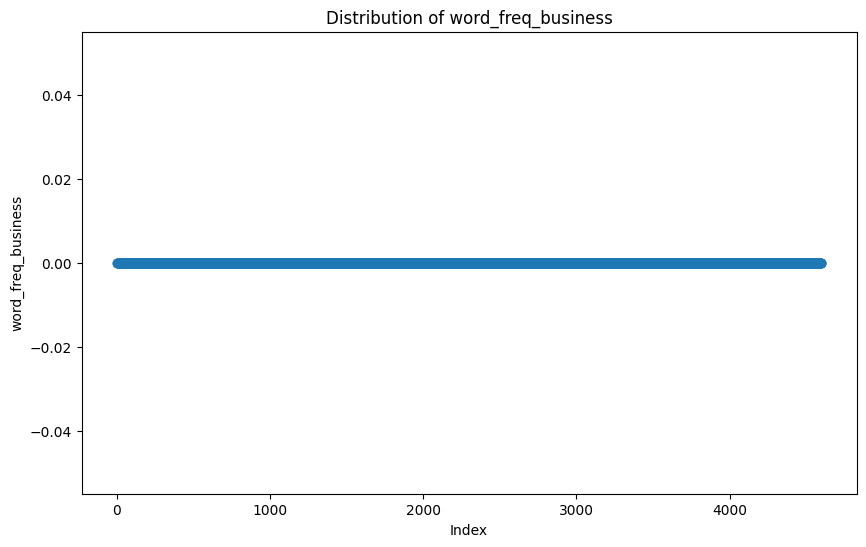

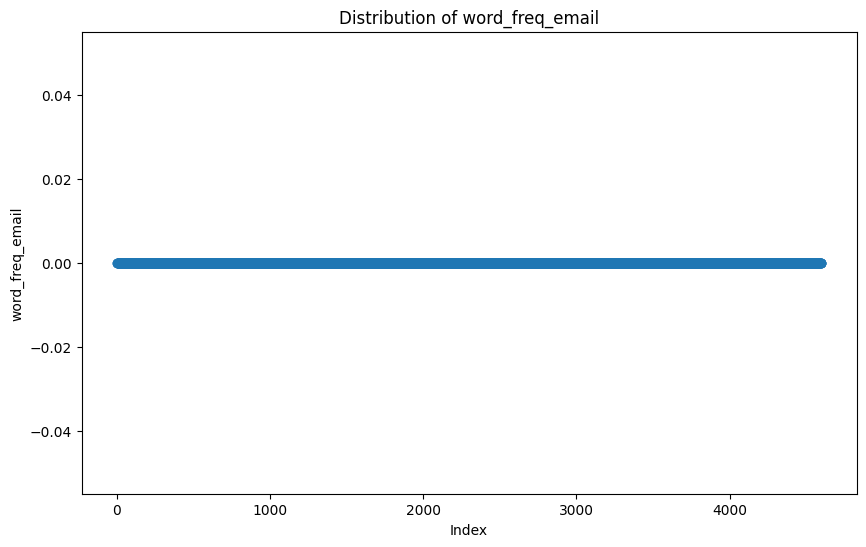

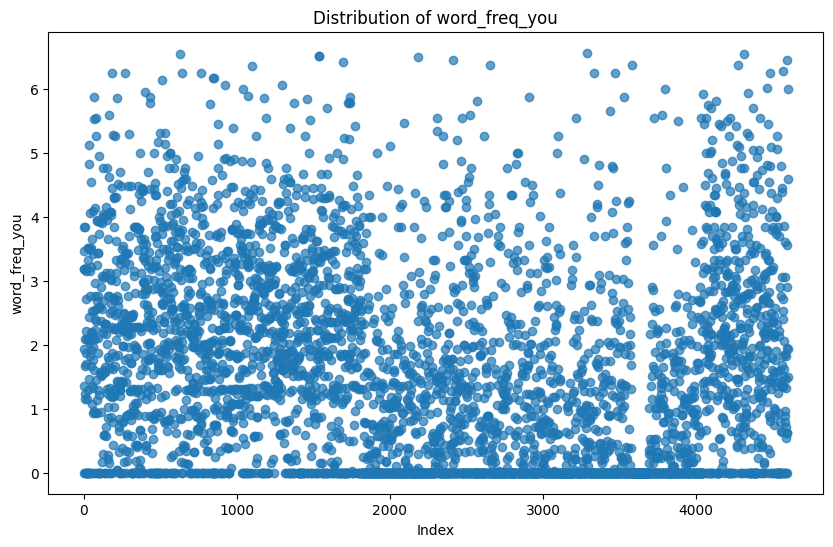

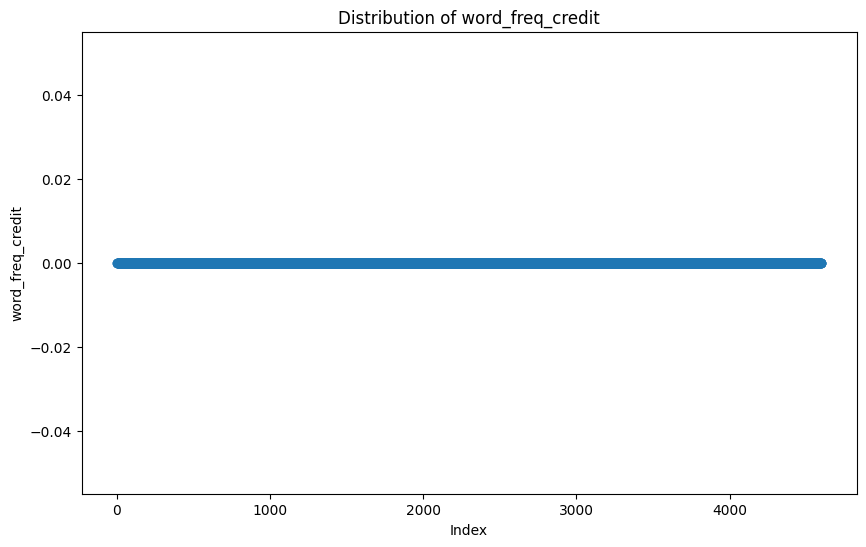

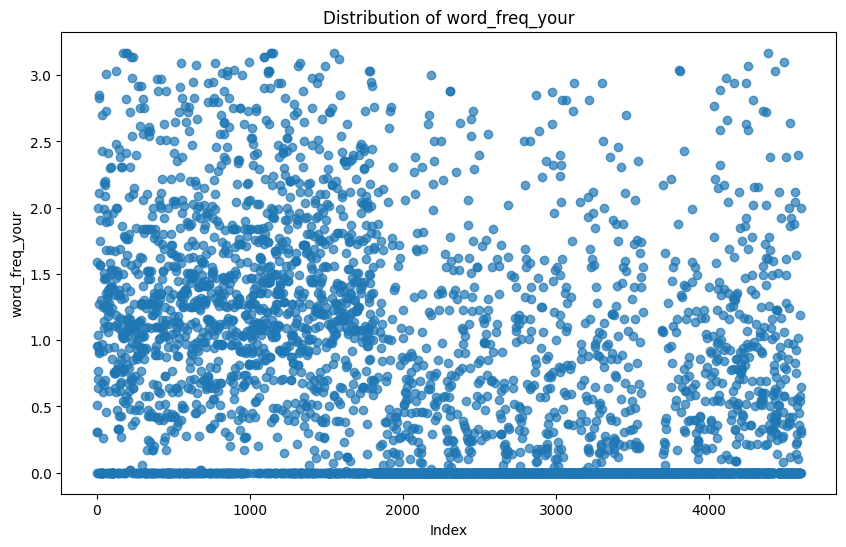

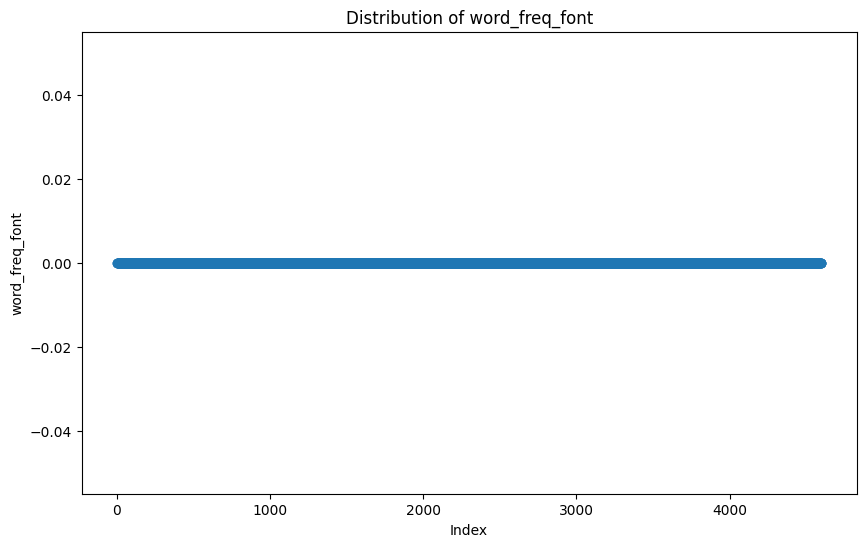

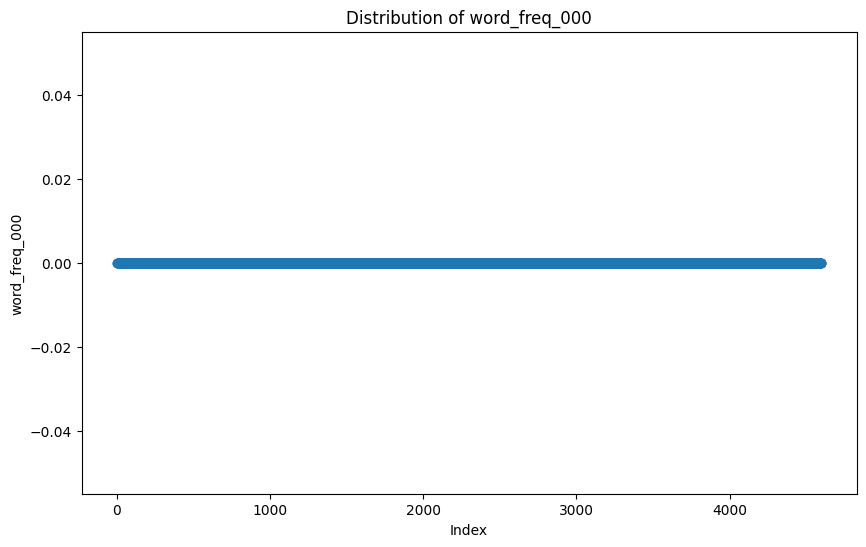

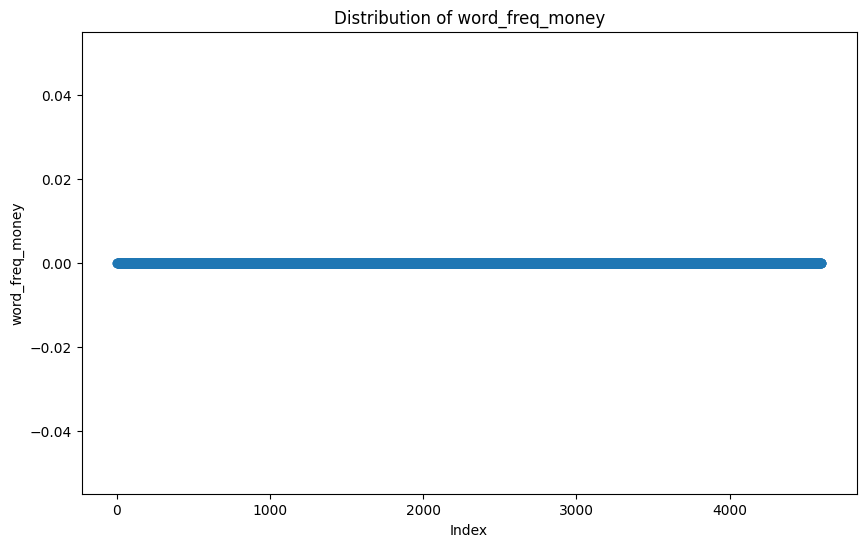

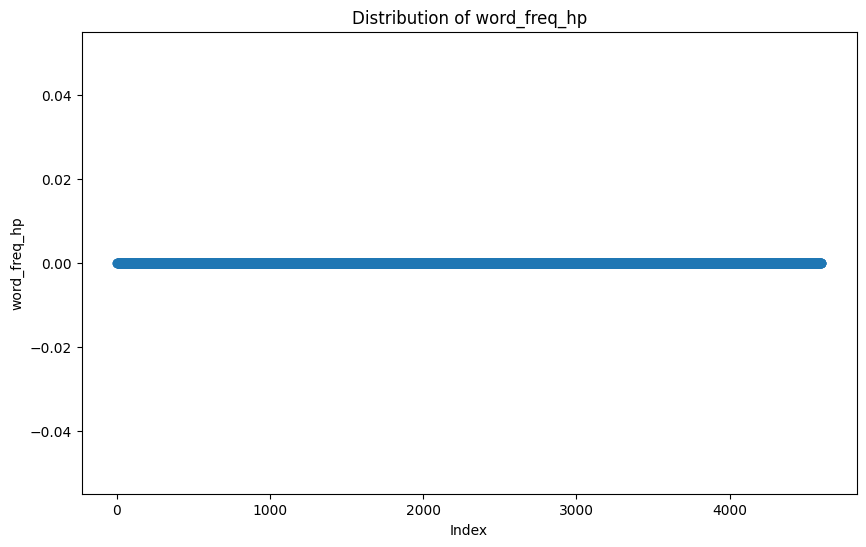

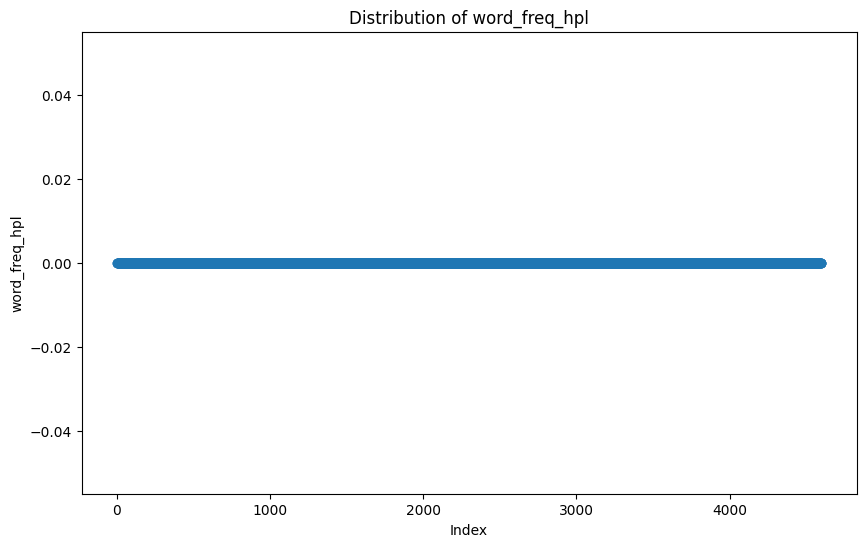

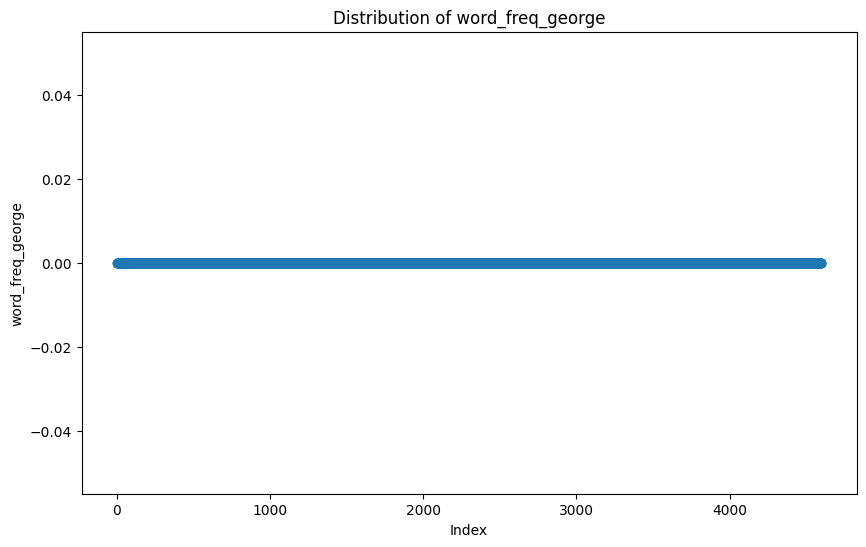

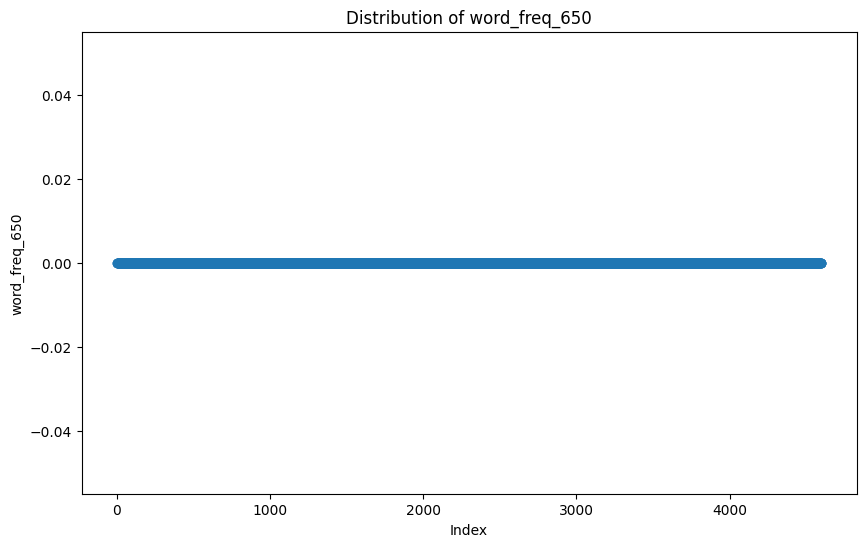

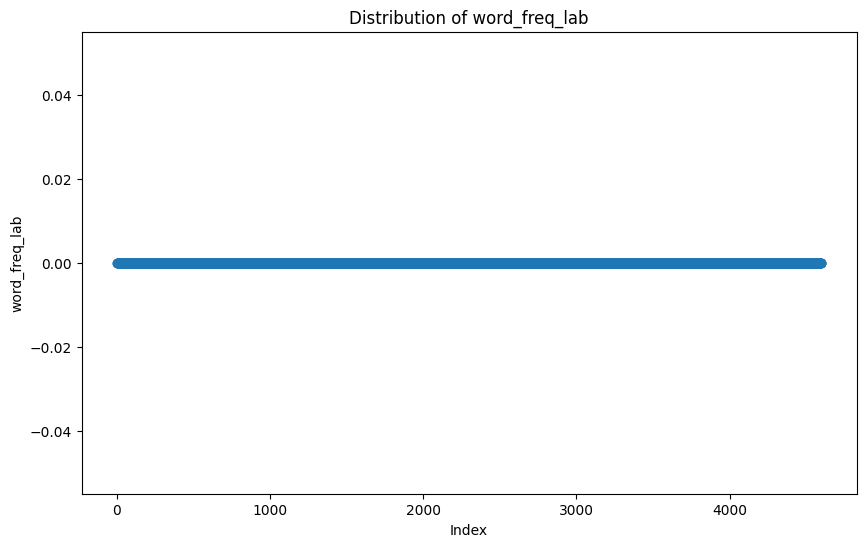

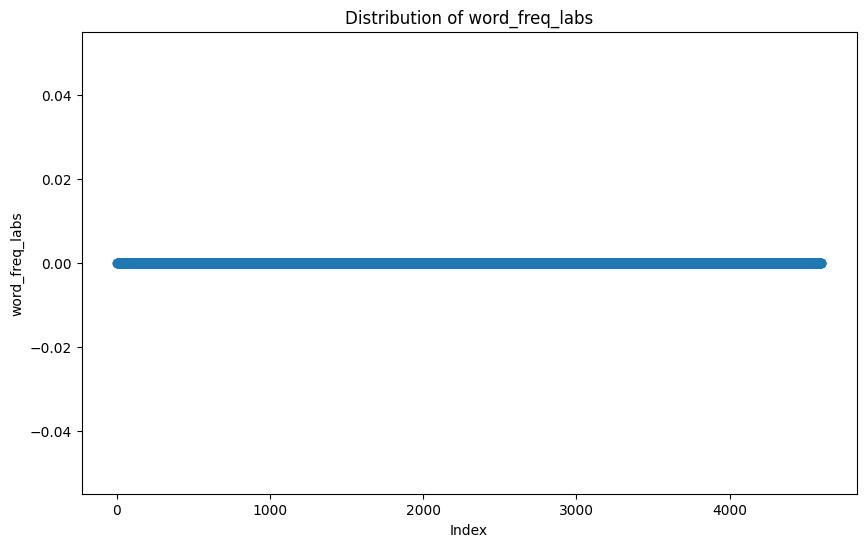

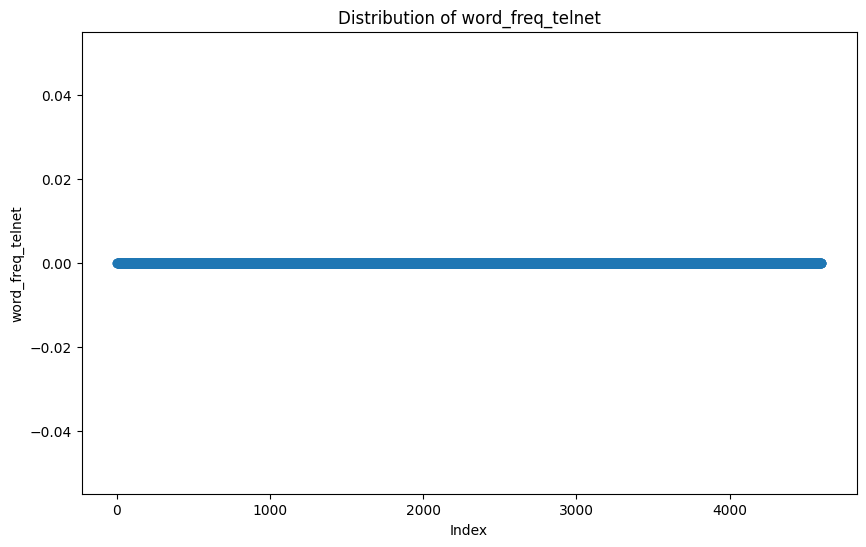

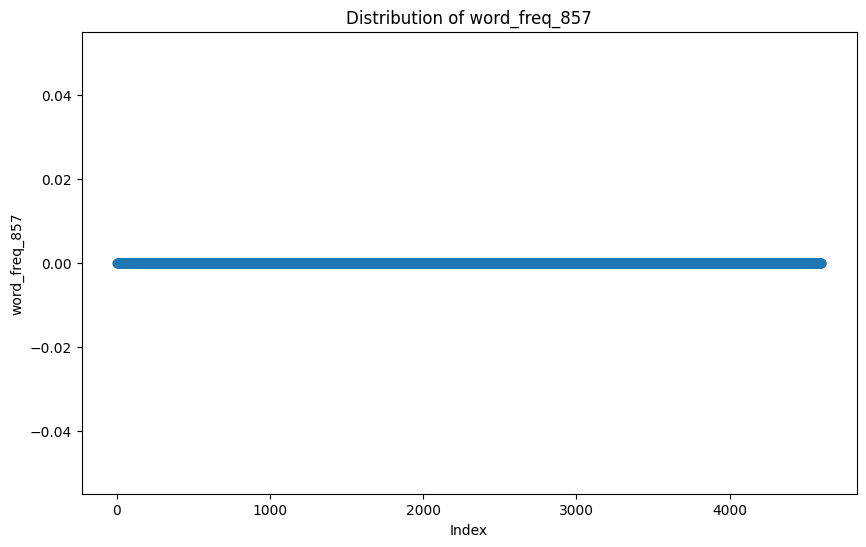

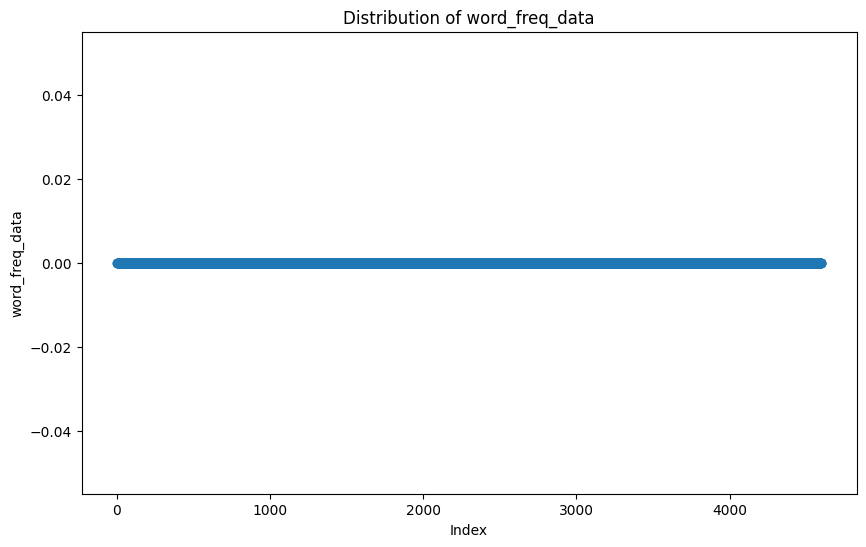

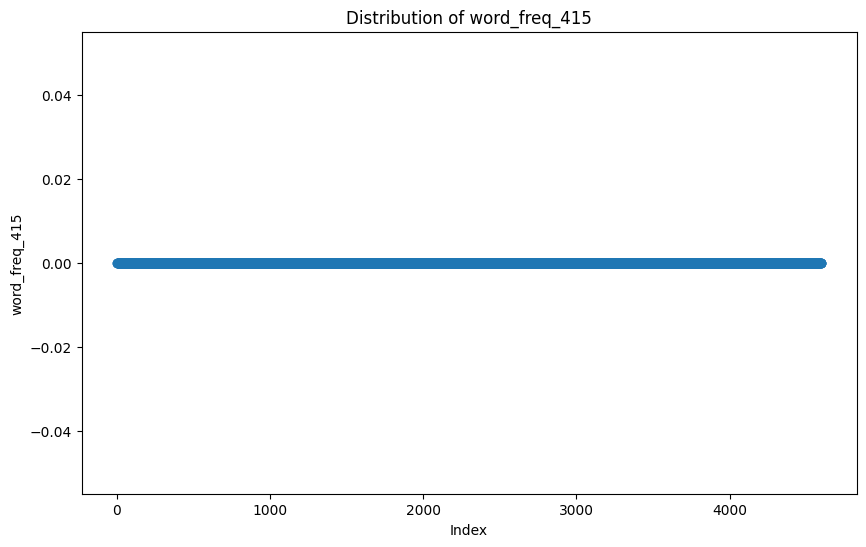

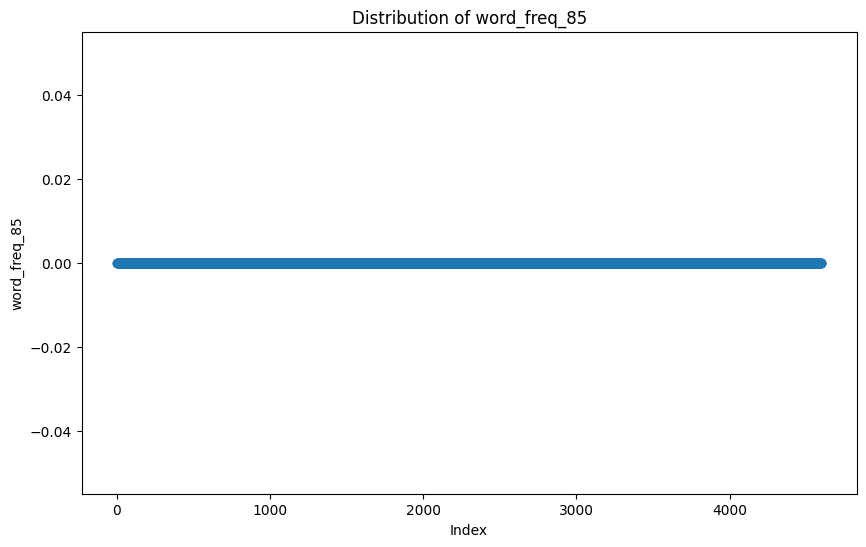

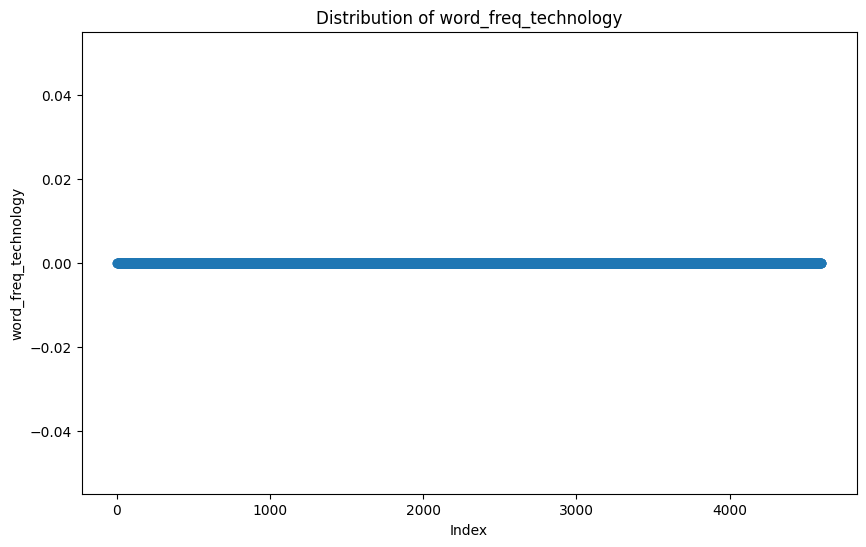

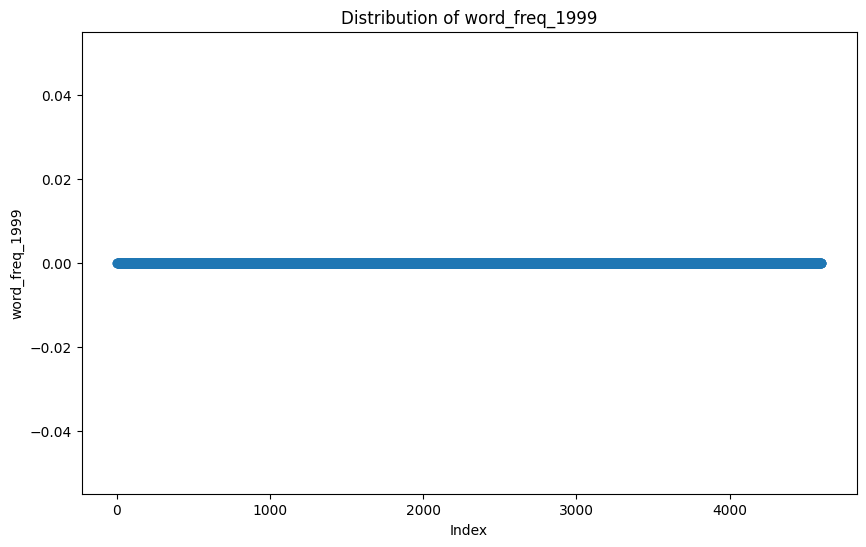

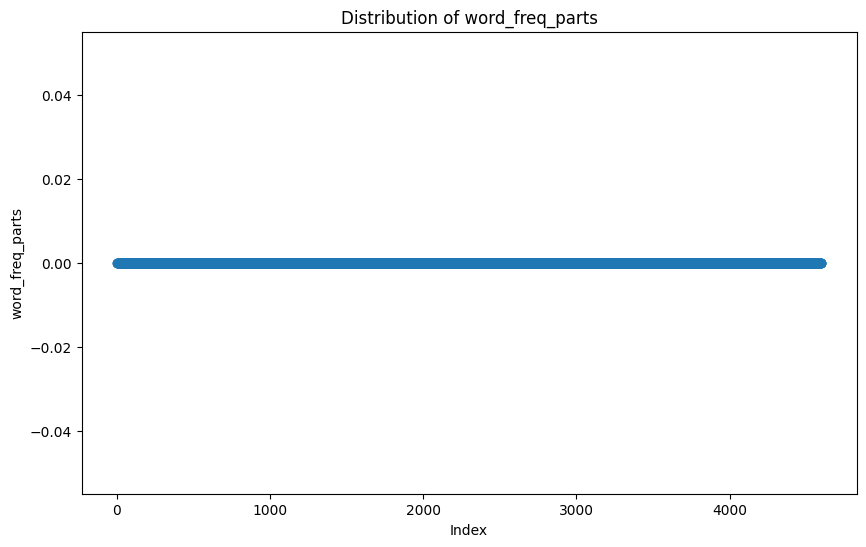

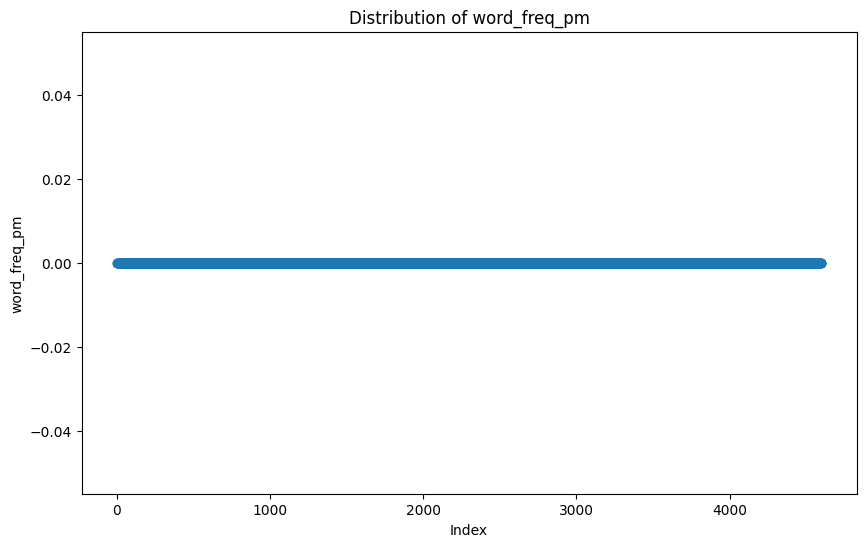

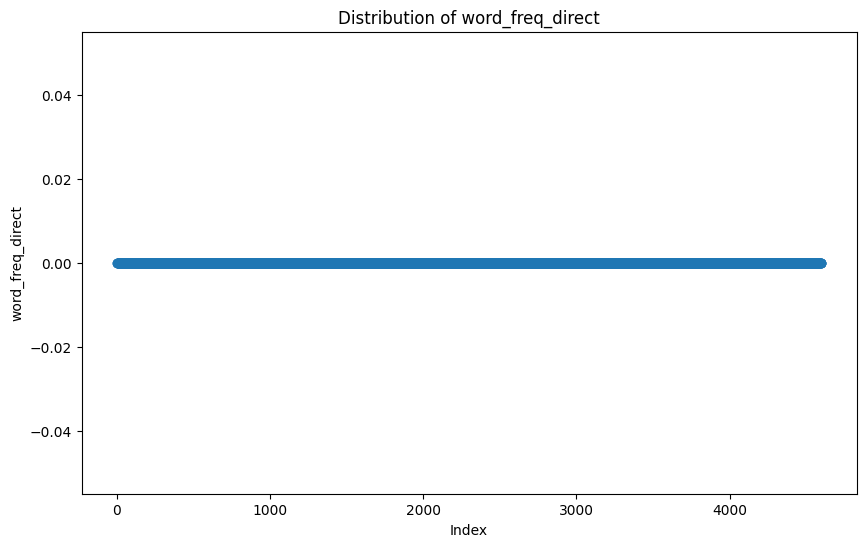

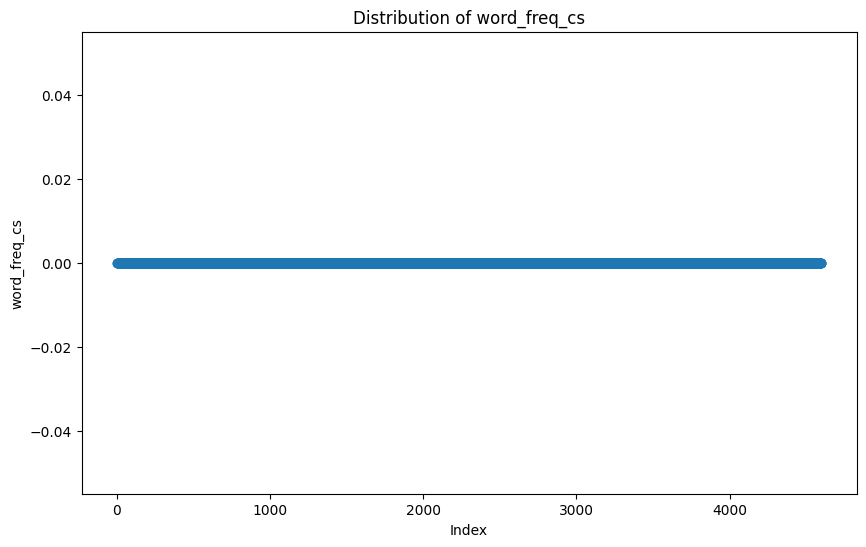

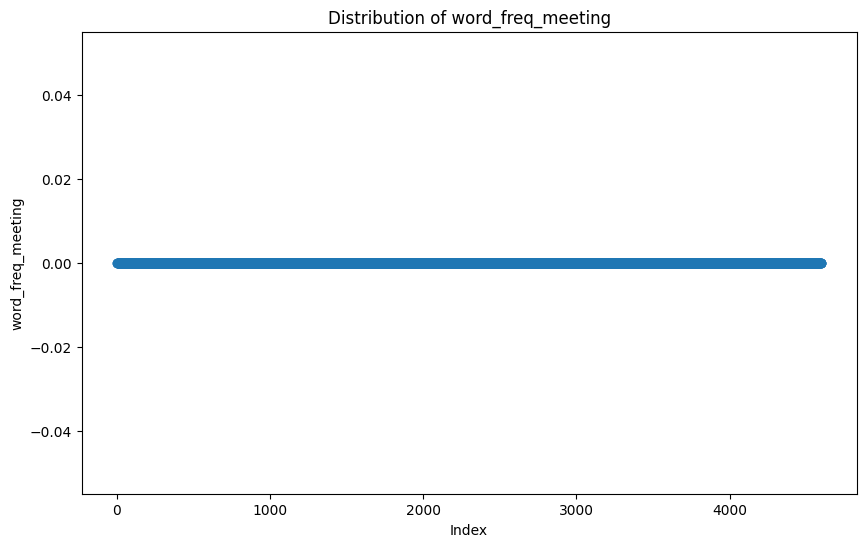

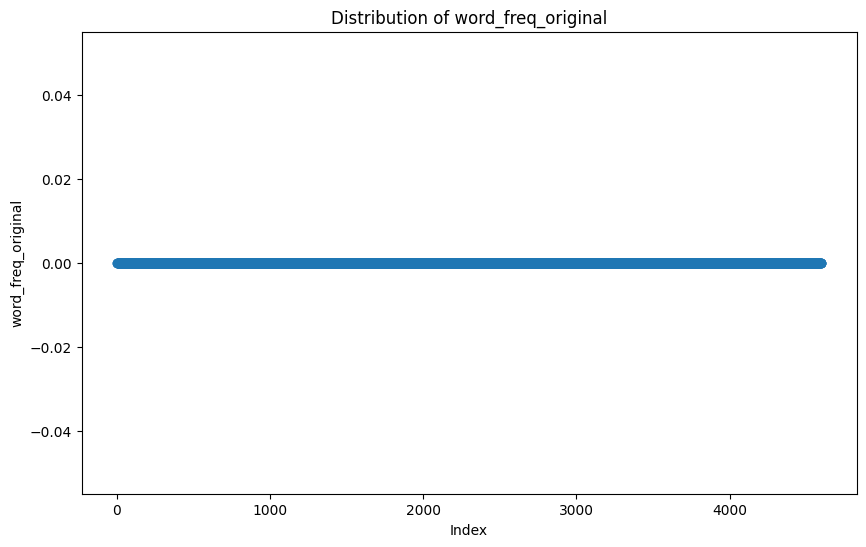

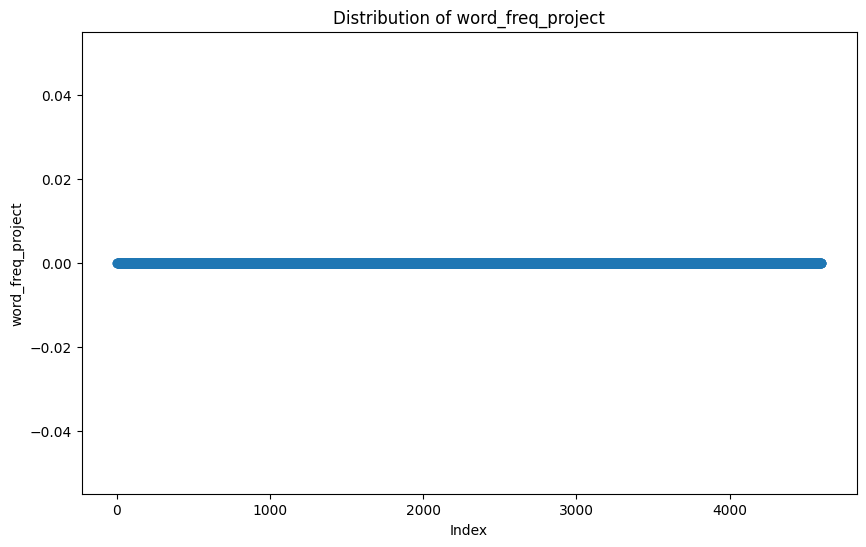

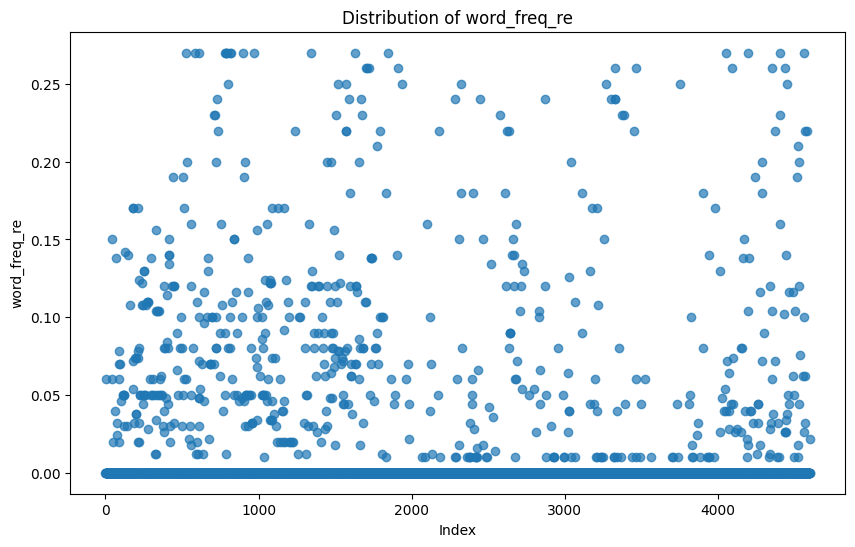

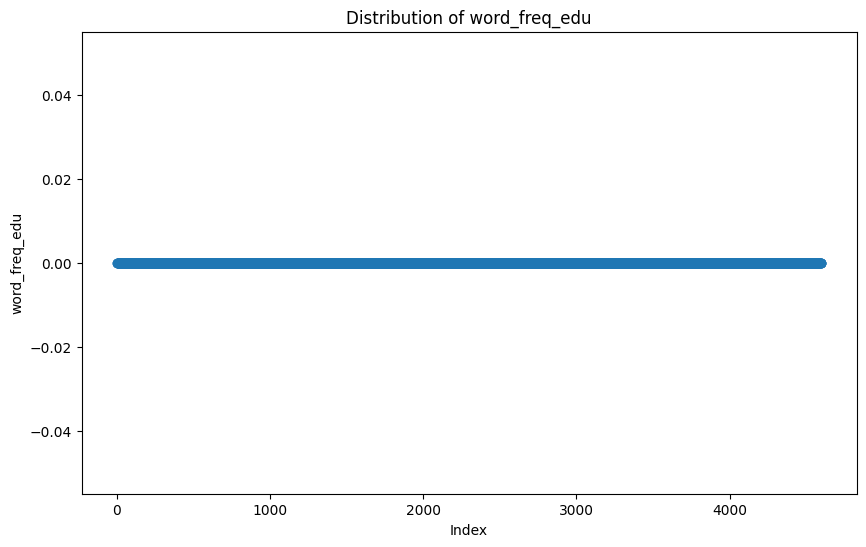

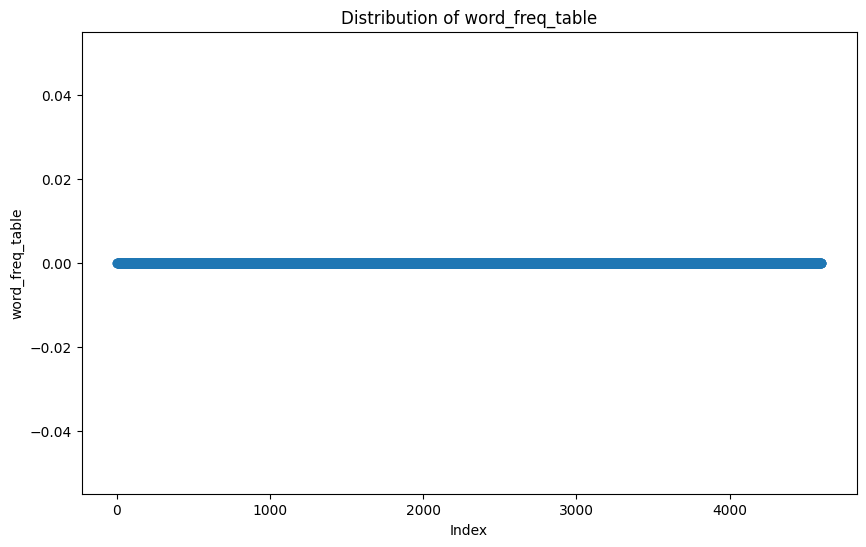

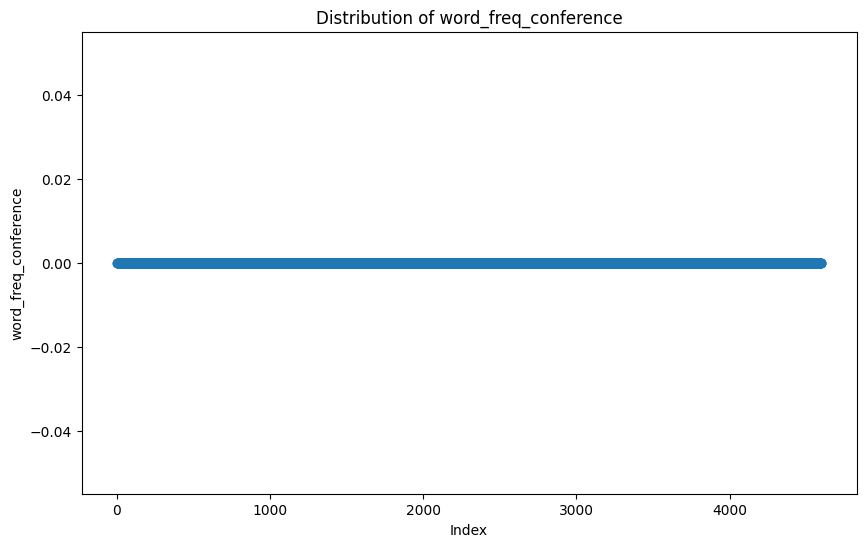

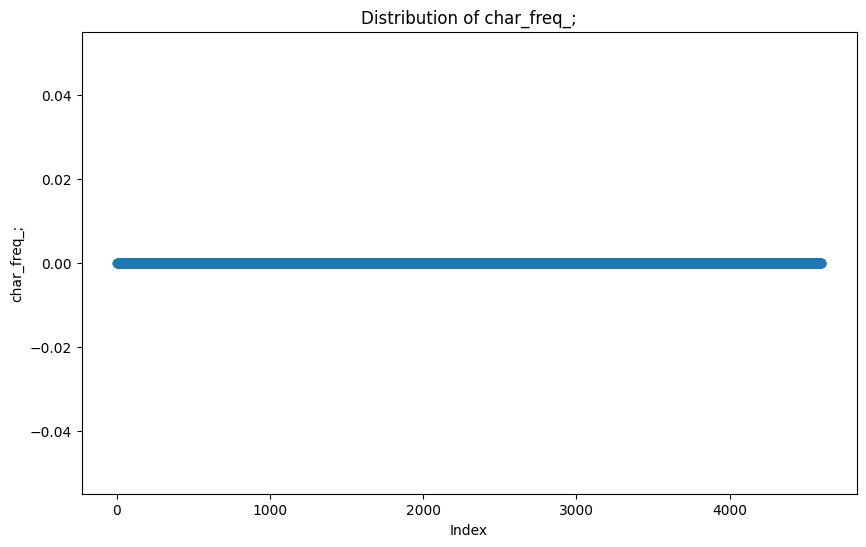

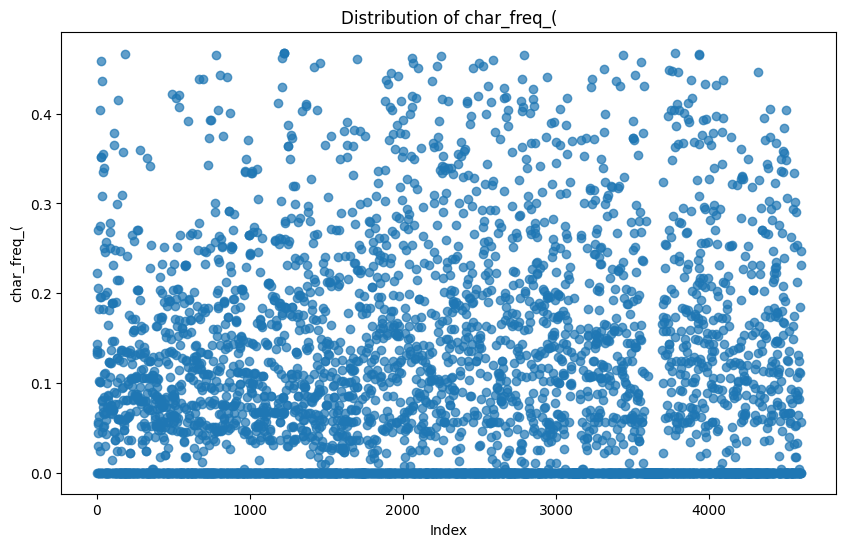

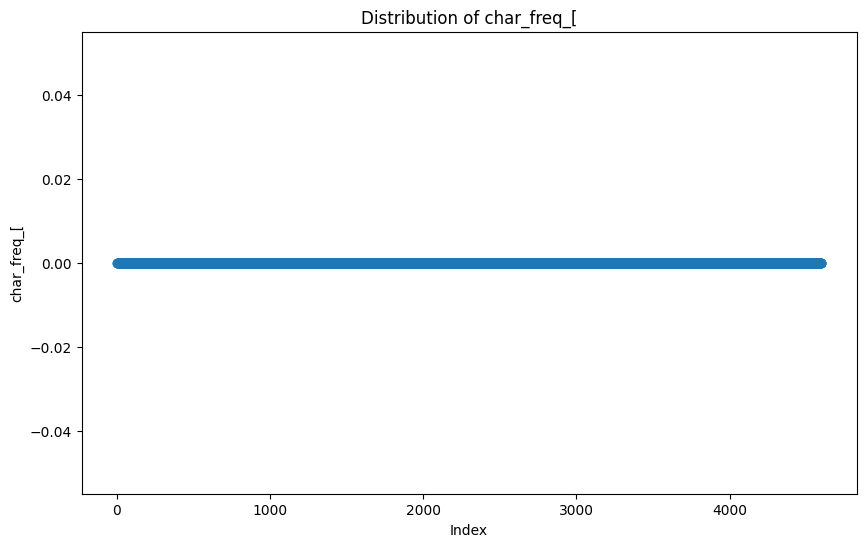

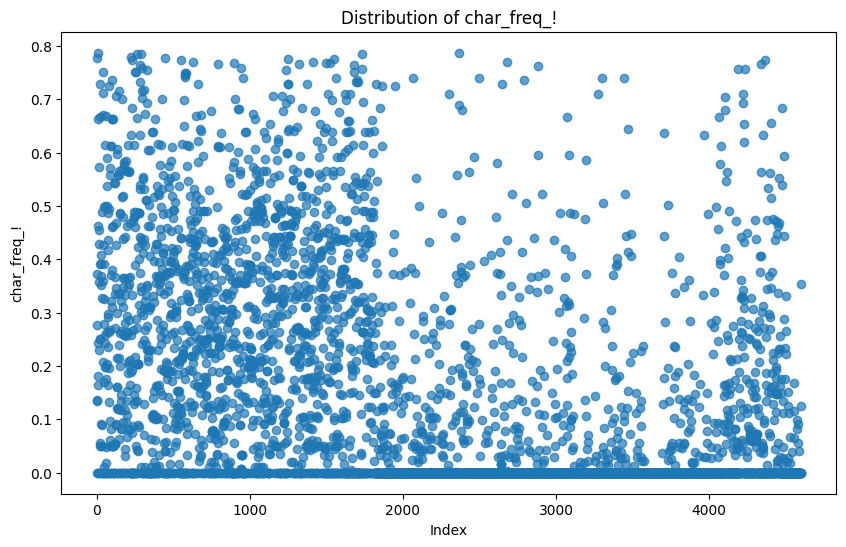

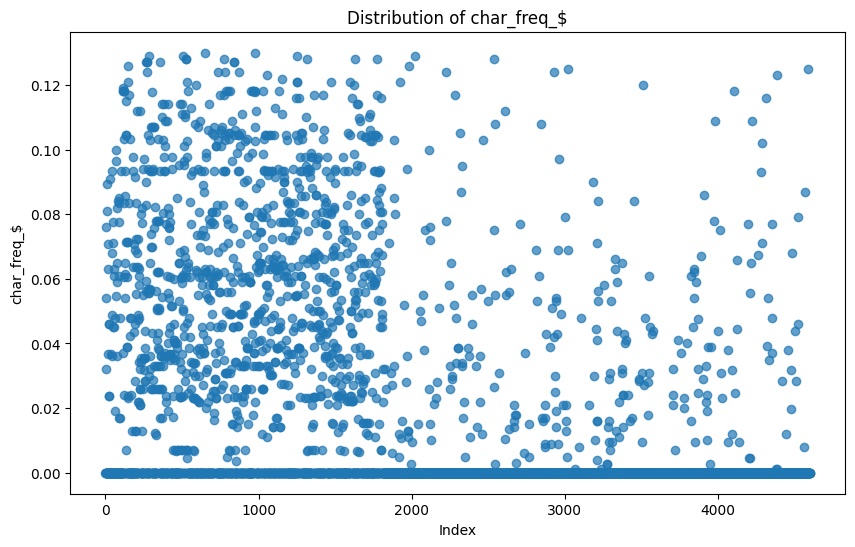

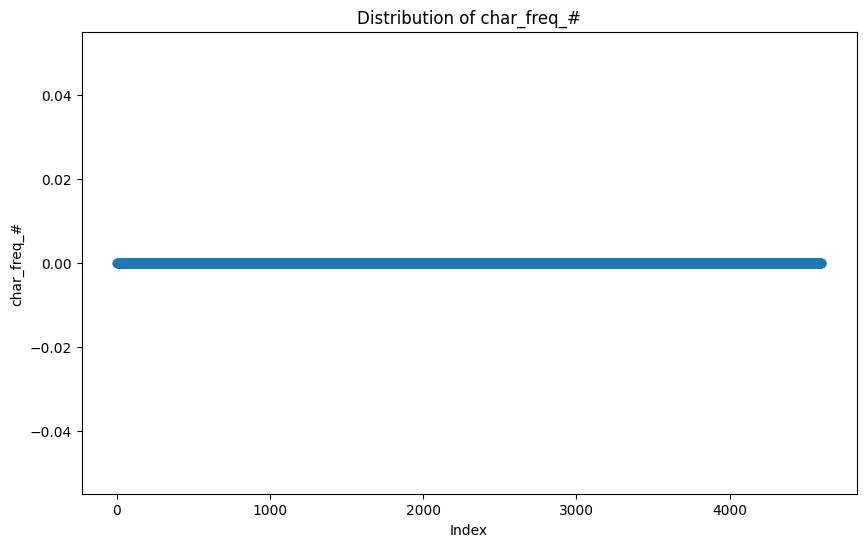

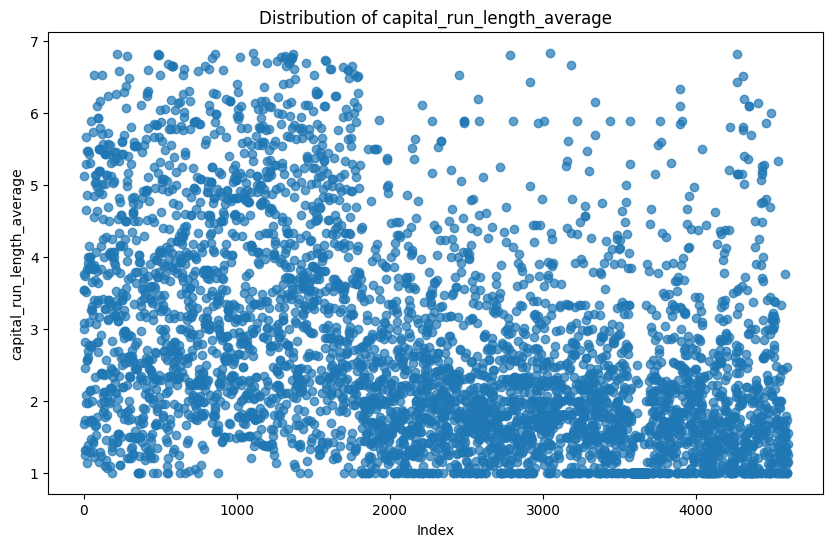

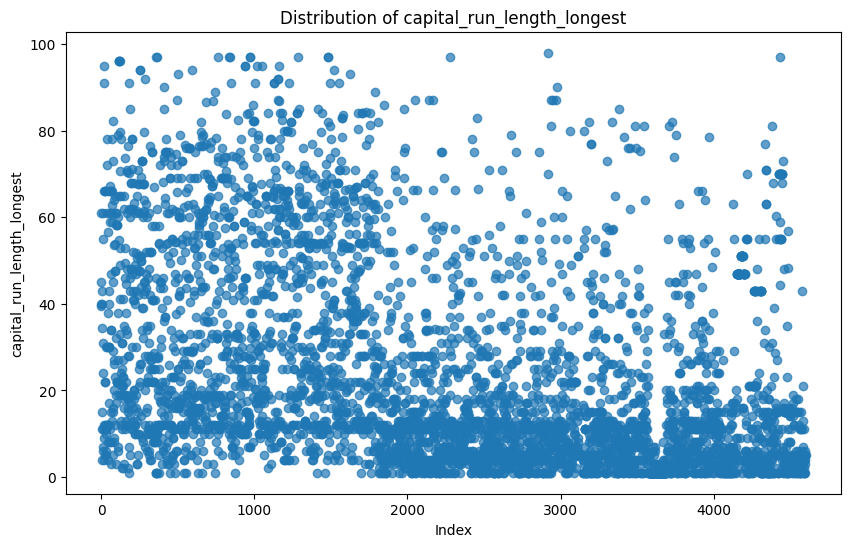

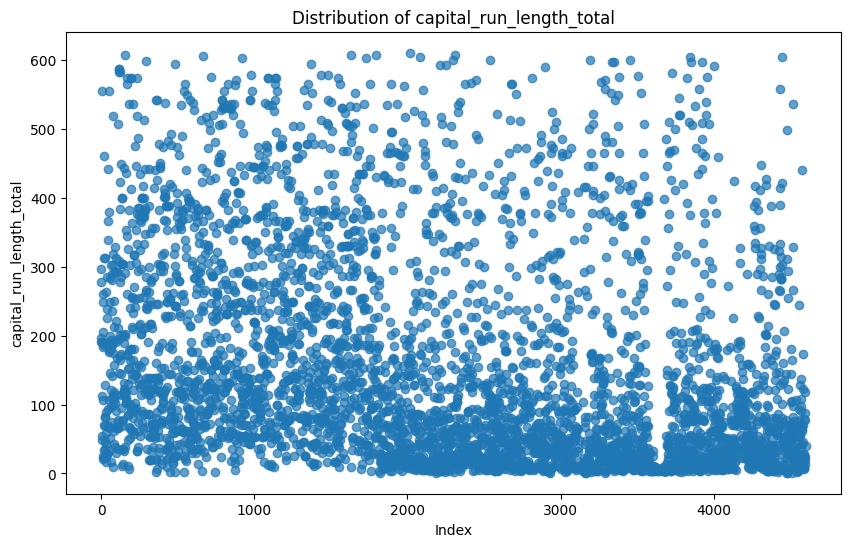

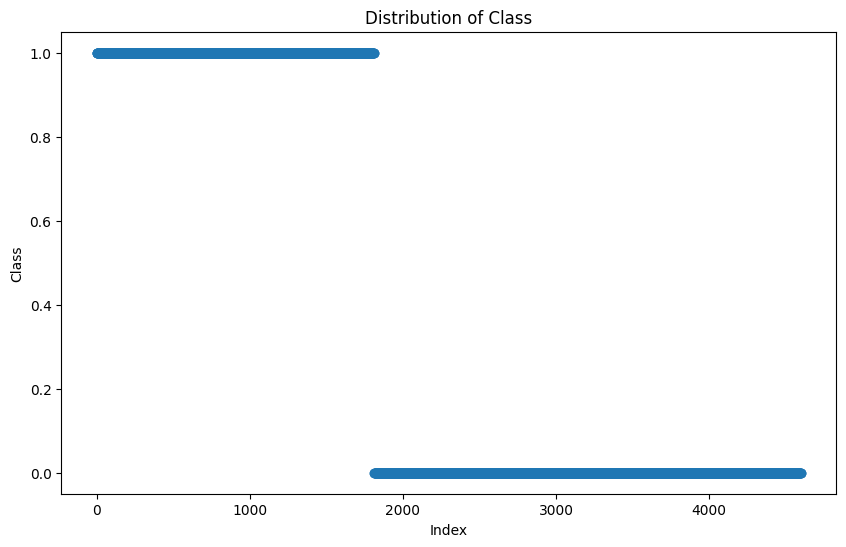

In [24]:
# Plotting the distribution of each numerical feature
for feature in numerical:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_imputed.index, df_imputed[feature], alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

In [25]:
# Assuming df_imputed is already defined
# Assign the target variable
y = df_imputed["Class"]

# Remove the target column from the feature dataset
X = df_imputed.drop(["Class"], axis=1)

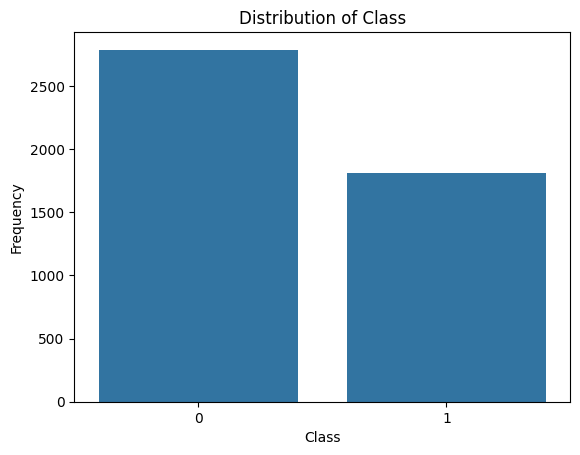

In [26]:
# Creating a plot to visualize the distribution of categories
sns.countplot(x=y)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')
plt.show()

#### **4. Feature Scaling**

In [27]:

# Split the dataset into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature scaling using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


# Ubah X_train_smote_scaled menjadi DataFrame dengan nama kolom yang sama seperti DataFrame asli
X_train_smote_scaled_df = pd.DataFrame(X_train_smote_scaled, columns=X_train.columns)

# Transformasikan juga X_test_scaled menjadi DataFrame dengan nama kolom yang sama
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Printing the shapes to confirm the transformations
print("Original X_train shape:", X_train.shape)
print("SMOTE X_train shape:", X_train_smote.shape)
print("Scaled X_train shape:", X_train_smote_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Original X_train shape: (3680, 57)
SMOTE X_train shape: (4460, 57)
Scaled X_train shape: (4460, 57)
Scaled X_test shape: (921, 57)


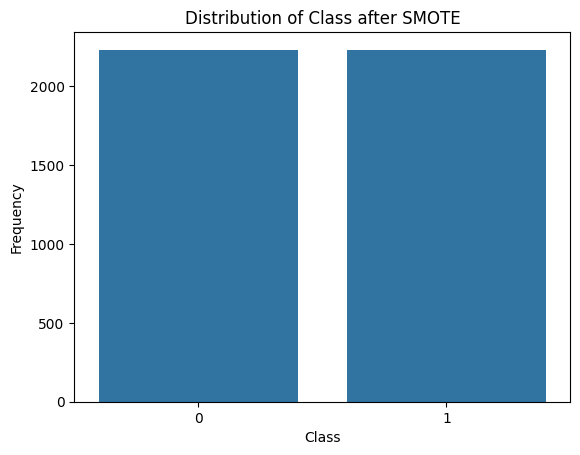

In [28]:
# Visualize the distribution of the target variable after SMOTE
sns.countplot(x=y_train_smote)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class after SMOTE')
plt.show()

#### **5. Model Training**

##### **Random Forest**

**WIthout Features Importance**

In [29]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define a refined parameter distribution
rf_param_dist_refined = {
    'n_estimators': randint(150, 250),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3),
    'bootstrap': [False],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None]
}

# Re-initialize and run RandomizedSearchCV with refined parameters
rf_random_search_refined = RandomizedSearchCV(estimator=rf_model, 
                                              param_distributions=rf_param_dist_refined, 
                                              n_iter=100,  # Increase the number of iterations
                                              cv=5, 
                                              n_jobs=-1, 
                                              verbose=2, 
                                              random_state=42)
rf_random_search_refined.fit(X_train_smote_scaled, y_train_smote)

# Best parameters and model evaluation
print("Best parameters for Random Forest (Refined Randomized Search):", rf_random_search_refined.best_params_)
rf_best_model_refined = rf_random_search_refined.best_estimator_
y_pred_rf_refined = rf_best_model_refined.predict(X_test_scaled)
print("\nRandom Forest (Refined Randomized Search) Classification Report:")
print(classification_report(y_test, y_pred_rf_refined))
print("Random Forest (Refined Randomized Search) Accuracy:", accuracy_score(y_test, y_pred_rf_refined))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Random Forest (Refined Randomized Search): {'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 232}

Random Forest (Refined Randomized Search) Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       558
           1       0.90      0.86      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921

Random Forest (Refined Randomized Search) Accuracy: 0.9077090119435396


**Features Importance**

In [30]:
# Setelah mengimpor modul-modul yang diperlukan sebelumnya

# Define a more comprehensive parameter grid
rf_param_dist_extended = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

# Initialize and run RandomizedSearchCV with more iterations
rf_model = RandomForestClassifier(random_state=42)
rf_random_search_extended = RandomizedSearchCV(estimator=rf_model, 
                                               param_distributions=rf_param_dist_extended, 
                                               n_iter=200, 
                                               cv=5, 
                                               n_jobs=-1, 
                                               verbose=2, 
                                               random_state=42)
rf_random_search_extended.fit(X_train_smote_scaled, y_train_smote)

# Best parameters and model evaluation
rf_best_model_randomized_extended = rf_random_search_extended.best_estimator_

# Feature Importance
rf_feature_importances = rf_best_model_randomized_extended.feature_importances_
sorted_idx = np.argsort(rf_feature_importances)[::-1]

# Select top features
X_train_smote_important = X_train_smote_scaled[:, sorted_idx[:10]]
X_test_important = X_test_scaled[:, sorted_idx[:10]]

# Train and evaluate using top features
rf_best_model_randomized_extended.fit(X_train_smote_important, y_train_smote)
y_pred_rf = rf_best_model_randomized_extended.predict(X_test_important)

print("\nRandom Forest with Important Features Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest with Important Features Accuracy:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Random Forest with Important Features Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       558
           1       0.91      0.88      0.89       363

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921

Random Forest with Important Features Accuracy: 0.9185667752442996


In [31]:
# Creating a DataFrame for feature importances
feature_names = X_train_smote_scaled_df.columns  # Assuming X_train_scaled_df is a DataFrame with column names
feature_importances_df = pd.DataFrame({
    'Feature': feature_names[sorted_idx],
    'Importance': rf_feature_importances[sorted_idx]
})

print("Feature Importances for Random Forest:\n", feature_importances_df)

Feature Importances for Random Forest:
                        Feature  Importance
0                  char_freq_!    0.162564
1                  char_freq_$    0.124093
2               word_freq_your    0.097195
3   capital_run_length_average    0.089926
4   capital_run_length_longest    0.081418
5     capital_run_length_total    0.081082
6               word_freq_free    0.076199
7                word_freq_you    0.064616
8                word_freq_our    0.063584
9                  char_freq_(    0.040017
10               word_freq_all    0.038802
11              word_freq_mail    0.035980
12              word_freq_will    0.033734
13                word_freq_re    0.010792
14          word_freq_business    0.000000
15               word_freq_000    0.000000
16           word_freq_address    0.000000
17              word_freq_font    0.000000
18                word_freq_3d    0.000000
19            word_freq_credit    0.000000
20              word_freq_over    0.000000
21            

##### **XGBoost**

**Without Features Importance**

In [32]:
# Convert DataFrames to NumPy arrays
X_train_scaled = X_train_smote_scaled_df.values
X_test_scaled = X_test_scaled_df.values

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 6, 10],  # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # Initialize XGBoost model

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # Initialize GridSearchCV with 5-fold cross-validation

# Train the model using GridSearchCV
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Display the best parameters
print(f"Best parameters: {grid_search.best_params_}")  # Print the best parameters found by GridSearchCV
print(f"Best XGBoost Validation Accuracy: {grid_search.best_score_}")  # Print the best validation accuracy obtained by GridSearchCV

# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_  # Select the best model found by GridSearchCV
y_pred_xgb_tuning = best_xgb_model.predict(X_test_scaled)  # Make predictions using the best model

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_xgb_tuning)  # Calculate the accuracy
print(f"XGBoost Accuracy: {accuracy}")  # Print the accuracy
print("Classification Report:")  # Print the classification report
print(classification_report(y_test, y_pred_xgb_tuning))  # Print the classification report

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Validation Accuracy: 0.9257847533632286
XGBoost Accuracy: 0.9163952225841476
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       558
           1       0.92      0.87      0.89       363

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



**Features Importance**

In [33]:
# Train an initial model to get feature importances
initial_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
initial_model.fit(X_train_smote_scaled, y_train_smote)

# Get feature importances from the initial model
feature_importances = initial_model.feature_importances_
feature_names = X_train_smote_scaled_df.columns

# Create a DataFrame to hold feature importances
importance_xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top important features
xgb_model_top_features = importance_xgb_df.head(10)['Feature'].tolist()
print(f"Top Important Features: {xgb_model_top_features}")

# Define X_train_top_features and X_test_top_features using top important features
X_train_top_features = X_train_smote_scaled_df[xgb_model_top_features]
X_test_top_features = X_test_scaled_df[xgb_model_top_features]

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [3, 6],  
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model using GridSearchCV
grid_search.fit(X_train_top_features, y_train_smote)

# Display the best parameters and best score
print(f"Best parameters (Top Features): {grid_search.best_params_}")
print(f"Best XGBoost Validation Accuracy (Top Features): {grid_search.best_score_}")

# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_top_features)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy with Top Features (Tuned): {accuracy}")
print("Classification Report with Top Features (Tuned):")
print(classification_report(y_test, y_pred_xgb))

Top Important Features: ['char_freq_$', 'char_freq_!', 'word_freq_free', 'word_freq_your', 'capital_run_length_average', 'word_freq_mail', 'word_freq_our', 'word_freq_re', 'char_freq_(', 'word_freq_you']
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters (Top Features): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost Validation Accuracy (Top Features): 0.9071748878923767
XGBoost Accuracy with Top Features (Tuned): 0.9087947882736156
Classification Report with Top Features (Tuned):
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       558
           1       0.90      0.87      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



In [34]:
# Create a DataFrame to hold feature importances
importance_xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame with feature importances
print("Feature Importances DataFrame:\n", importance_xgb_df)

Feature Importances DataFrame:
                        Feature  Importance
52                 char_freq_$    0.275336
51                 char_freq_!    0.257546
15              word_freq_free    0.136395
20              word_freq_your    0.040690
54  capital_run_length_average    0.039408
9               word_freq_mail    0.032811
4                word_freq_our    0.032377
44                word_freq_re    0.030892
49                 char_freq_(    0.028632
18               word_freq_you    0.028043
55  capital_run_length_longest    0.027633
56    capital_run_length_total    0.026360
11              word_freq_will    0.022741
2                word_freq_all    0.021136
36              word_freq_1999    0.000000
37             word_freq_parts    0.000000
41           word_freq_meeting    0.000000
38                word_freq_pm    0.000000
39            word_freq_direct    0.000000
35        word_freq_technology    0.000000
34                word_freq_85    0.000000
40                word

##### **Logistic Regression**

**Without Features Importance**

In [35]:

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train_smote_scaled_df, y_train_smote)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test_scaled_df)

# Define parameter grid for GridSearchCV
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and elasticnet regularization
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mixing parameter for elasticnet
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Filter out invalid combinations of penalty and solver
valid_param_grid_lr = []
for penalty in param_grid_lr['penalty']:
    for solver in param_grid_lr['solver']:
        if (penalty == 'elasticnet' and solver != 'saga'):
            continue
        if penalty == 'elasticnet':
            for l1_ratio in param_grid_lr['l1_ratio']:
                valid_param_grid_lr.append({'penalty': [penalty], 'C': [C], 'solver': [solver], 'max_iter': [max_iter], 'l1_ratio': [l1_ratio]})
        else:
            for C in param_grid_lr['C']:
                for max_iter in param_grid_lr['max_iter']:
                    valid_param_grid_lr.append({'penalty': [penalty], 'C': [C], 'solver': [solver], 'max_iter': [max_iter]})

# Initialize GridSearchCV with the valid parameter grid
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=valid_param_grid_lr, cv=5, n_jobs=-1, verbose=2, error_score='raise')

# Train the model using GridSearchCV
grid_search_lr.fit(X_train_smote_scaled_df, y_train_smote)

# Display the best parameters
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best Logistic Regression Validation Accuracy: {grid_search_lr.best_score_}")

# Use the best model for prediction
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_tuning = best_lr_model.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr_tuning)
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tuning))

Fitting 5 folds for each of 53 candidates, totalling 265 fits
Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Validation Accuracy: 0.863677130044843
Logistic Regression Accuracy: 0.8610206297502715
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       558
           1       0.82      0.82      0.82       363

    accuracy                           0.86       921
   macro avg       0.85      0.85      0.85       921
weighted avg       0.86      0.86      0.86       921



**Features Importance**

In [36]:
def get_top_features(X_train_smote_scaled_df, y_train_smote):
    # Train an initial model to get feature importances
    initial_lr_model = LogisticRegression(random_state=42)
    initial_lr_model.fit(X_train_smote_scaled_df, y_train_smote)
    
    # Get feature importances (coefficients) from the initial model
    feature_importances_lr = abs(initial_lr_model.coef_[0])
    feature_names = X_train_smote_scaled_df.columns
    
    # Create a DataFrame to hold feature importances
    importance_lr_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_lr})
    
    # Sort features by importance
    importance_lr_df = importance_lr_df.sort_values(by='Importance', ascending=False)
    
    # Select top important features
    lr_model_top_features = importance_lr_df.head(10)['Feature'].tolist()
    return lr_model_top_features, importance_lr_df


# Example usage:
# Assuming X_train_scaled_df and y_train_smote are already defined
top_features, importance_lr_df = get_top_features(X_train_smote_scaled_df, y_train_smote)

# Display the DataFrame with feature importances
print("DataFrame with Feature Importances:")
print(importance_lr_df.to_string(index=False))  # Print the DataFrame with feature importances


DataFrame with Feature Importances:
                   Feature  Importance
               char_freq_$    1.074334
capital_run_length_average    0.975368
               char_freq_!    0.843429
            word_freq_free    0.683462
             word_freq_our    0.489016
            word_freq_your    0.474033
  capital_run_length_total    0.292087
             word_freq_you    0.267515
            word_freq_mail    0.219946
            word_freq_will    0.198953
capital_run_length_longest    0.148890
               char_freq_(    0.135592
              word_freq_re    0.131665
             word_freq_all    0.129097
      word_freq_technology    0.000000
         word_freq_meeting    0.000000
            word_freq_1999    0.000000
           word_freq_parts    0.000000
              word_freq_85    0.000000
              word_freq_pm    0.000000
          word_freq_direct    0.000000
              word_freq_cs    0.000000
           word_freq_table    0.000000
        word_freq_original  

In [37]:

# Get top features using the previously defined function
top_features, _ = get_top_features(X_train_smote_scaled_df, y_train_smote)

# Select only the top features for training and testing datasets
X_train_top_features_lr = X_train_smote_scaled_df[top_features]
X_test_top_features_lr = X_test_scaled_df[top_features]

# Define a smaller parameter grid for GridSearchCV
param_grid_lr_top = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 regularization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize Logistic Regression model
lr_model_top = LogisticRegression(random_state=42, penalty='none')  # Initialize Logistic Regression model without regularization

# Initialize GridSearchCV
grid_search_lr_top = GridSearchCV(estimator=lr_model_top, param_grid=param_grid_lr_top, cv=5, n_jobs=-1, verbose=2, error_score='raise')  # Initialize GridSearchCV with 5-fold cross-validation

# Train the model using GridSearchCV
grid_search_lr_top.fit(X_train_top_features_lr, y_train_smote)

# Display the best parameters and best score
print(f"Best parameters (Top Features): {grid_search_lr_top.best_params_}")  # Print the best parameters found by GridSearchCV
print(f"Best Logistic Regression Validation Accuracy (Top Features): {grid_search_lr_top.best_score_}")  # Print the best validation accuracy obtained by GridSearchCV

# Use the best model for prediction
best_lr_model_top = grid_search_lr_top.best_estimator_  # Select the best model found by GridSearchCV
y_pred_lr_top = best_lr_model_top.predict(X_test_top_features_lr)  # Make predictions using the best model

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr_top)  # Calculate the accuracy
print(f"Logistic Regression Accuracy with Top Features (Tuned): {accuracy}")  # Print the accuracy
print("Classification Report with Top Features (Tuned):")  # Print the classification report header
print(classification_report(y_test, y_pred_lr_top))  # Print the classification report

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters (Top Features): {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Validation Accuracy (Top Features): 0.8632286995515696
Logistic Regression Accuracy with Top Features (Tuned): 0.8555917480998915
Classification Report with Top Features (Tuned):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       558
           1       0.82      0.82      0.82       363

    accuracy                           0.86       921
   macro avg       0.85      0.85      0.85       921
weighted avg       0.86      0.86      0.86       921



##### **Neural Network**

**Without Features Imprtance**

In [38]:
# Define a function to create the NN model, required for KerasClassifier
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train_smote_scaled_df.shape[1],), kernel_initializer=init, activation='relu'))  # Input layer with 64 neurons, ReLU activation function
    model.add(Dense(32, kernel_initializer=init, activation='relu'))  # Hidden layer with 32 neurons, ReLU activation function
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))  # Output layer with 1 neuron, sigmoid activation function for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with binary crossentropy loss function and accuracy metric
    return model

# Filter training and testing sets to use all features
X_train_all_features_nn = X_train_smote_scaled_df
X_test_all_features_nn = X_test_scaled_df

# Create the KerasClassifier for GridSearchCV with all features
model_all_features = KerasClassifier(
    build_fn=create_model, 
    optimizer='adam', 
    init='uniform', 
    verbose=0
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'batch_size': [10, 20, 40],  # Batch size for training
    'epochs': [10, 50, 100],  # Number of epochs for training
    'optimizer': ['adam', 'rmsprop'],  # Optimizers to use
    'init': ['uniform', 'normal', 'glorot_uniform']  # Weight initialization methods
}

# Initialize GridSearchCV for all features
grid_search_all_features = GridSearchCV(estimator=model_all_features, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model using GridSearchCV with all features
grid_search_all_features.fit(X_train_all_features_nn, y_train_smote)

# Display the best parameters and best score
print(f"Best parameters (All Features): {grid_search_all_features.best_params_}")  # Print the best parameters found by GridSearchCV
print(f"Best Neural Network Validation Accuracy (All Features): {grid_search_all_features.best_score_}")  # Print the best validation accuracy obtained by GridSearchCV

# Use the best model for prediction with all features
best_nn_model_all = grid_search_all_features.best_estimator_  # Select the best model found by GridSearchCV
y_pred_nn_all = (best_nn_model_all.predict(X_test_all_features_nn) > 0.5).astype("int32")  # Make predictions on the test set using a threshold of 0.5 for binary classification

# Evaluate the model with all features
accuracy_nn_all = accuracy_score(y_test, y_pred_nn_all)  # Calculate the accuracy
print(f"Neural Network Accuracy with All Features (Tuned): {accuracy_nn_all}")  # Print the accuracy
print("Classification Report with All Features (Tuned):")  # Print the classification report header
print(classification_report(y_test, y_pred_nn_all))  # Print the classification report

Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\Michelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\Michelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Michelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters (All Features): {'batch_size': 10, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
Best Neural Network Validation Accuracy (All Features): 0.9100941523109057
Neural Network Accuracy with All Features (Tuned): 0.8794788273615635
Classification Report with All Features (Tuned):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       558
           1       0.85      0.85      0.85       363

    accuracy                           0.88       921
   macro avg       0.87      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921



**Features Importance**

In [39]:
# Train an initial model to get feature importances
initial_model = Sequential([
    Dense(64, input_shape=(X_train_smote_scaled_df.shape[1],), activation='relu'),  # Input layer with 64 neurons, ReLU activation function
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons, ReLU activation function
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron, sigmoid activation function for binary classification
])

initial_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with binary crossentropy loss function and accuracy metric
initial_model.fit(X_train_smote_scaled_df, y_train_smote, epochs=10, batch_size=32, verbose=1)  # Train the model with 10 epochs and batch size of 32

# Get feature importances from the initial model (using weights from the input layer)
feature_importances_nn = abs(initial_model.layers[0].get_weights()[0]).sum(axis=1)  # Extract weights from the input layer and sum them along rows to get feature importances
feature_names = X_train_smote_scaled_df.columns  # Get feature names

# Create a DataFrame to hold feature importances
importance_nn_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_nn})

# Sort features by importance
importance_nn_df = importance_nn_df.sort_values(by='Importance', ascending=False)

# Select top important features (e.g., top 10)
nn_model_top_features = importance_nn_df.head(10)['Feature'].tolist()
print(f"Top Important Features: {nn_model_top_features}")

# Display the DataFrame with feature importances
print(importance_nn_df)

Epoch 1/10


c:\Users\Michelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7565 - loss: 0.5028
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8718 - loss: 0.3153
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8863 - loss: 0.2960
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8923 - loss: 0.2756
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8946 - loss: 0.2742
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9029 - loss: 0.2634
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8971 - loss: 0.2597
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8942 - loss: 0.2651
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9028 - loss: 0.2506
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9101 - loss: 0.2484
Top Important Features: ['word_freq_free', 'char_freq_$', 'word_freq_all', 'char_freq_(', 'word_freq_you', 'word_freq_original', '

In [40]:
# Define a function to create the NN model, required for KerasClassifier
def create_model(optimizer='adam', init='uniform', input_dim=None):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))  # Input layer with 64 neurons, ReLU activation function
    model.add(Dense(32, kernel_initializer=init, activation='relu'))  # Hidden layer with 32 neurons, ReLU activation function
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))  # Output layer with 1 neuron, sigmoid activation function for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with binary crossentropy loss function and accuracy metric
    return model

# Filter training and testing sets to use only top features
X_train_top_features_nn = X_train_smote_scaled_df[nn_model_top_features]
X_test_top_features_nn = X_test_scaled_df[nn_model_top_features]

# Create the KerasClassifier for GridSearchCV with top features
model_top_features = KerasClassifier(
    model=create_model, 
    optimizer='adam', 
    init='uniform', 
    input_dim=X_train_top_features_nn.shape[1], 
    verbose=0
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'init': ['uniform', 'normal', 'glorot_uniform']
}

# Initialize GridSearchCV for top features
grid_search_top_features = GridSearchCV(estimator=model_top_features, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model using GridSearchCV with top features
grid_search_top_features.fit(X_train_top_features_nn, y_train_smote)

# Display the best parameters and best score
print(f"Best parameters (Top Features): {grid_search_top_features.best_params_}")
print(f"Best Neural Network Validation Accuracy (Top Features): {grid_search_top_features.best_score_}")

# Use the best model for prediction with top features
best_nn_model_top = grid_search_top_features.best_estimator_
y_pred_nn_top = (best_nn_model_top.predict(X_test_top_features_nn) > 0.5).astype("int32")

# Evaluate the model with top features
accuracy_nn_top = accuracy_score(y_test, y_pred_nn_top)
print(f"Neural Network Accuracy with Top Features (Tuned): {accuracy_nn_top}")
print("Classification Report with Top Features (Tuned):")
print(classification_report(y_test, y_pred_nn_top))


Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\Michelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters (Top Features): {'batch_size': 20, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
Best Neural Network Validation Accuracy (Top Features): 0.892382101436617
Neural Network Accuracy with Top Features (Tuned): 0.8794788273615635
Classification Report with Top Features (Tuned):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       558
           1       0.86      0.83      0.84       363

    accuracy                           0.88       921
   macro avg       0.88      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921

